# Análisis de Jugadores de Fútbol Profesionales menores de 21 años: Detección de Anomalías y Visualización de Datos
![Texto Alternativo](imagen_portada.webp)

### Descripción del Proyecto
#### Proyecto fin de curso Machine Learning de Tokio School, mayo de 2024.

Este proyecto tiene como objetivo analizar las estadísticas de jugadores de fútbol mediante técnicas de machine learning para detectar anomalías, predecir rendimientos futuros, y realizar análisis exploratorios de los datos,los jugadores tienen edades comprendidas entre los 16 y 20 años de edad.

### Pasos Realizados:

#### Carga y Preprocesamiento de Datos
- Importación de las bibliotecas necesarias.
- Carga de los datos desde un archivo CSV.
- Imputación de valores faltantes y conversión de datos categóricos a numéricos.

#### Análisis Exploratorio de Datos (EDA)
- Visualización de la distribución de variables clave.
- Análisis de la correlación entre diferentes características.

#### Detección de Anomalías
- Implementación de un modelo de Isolation Forest para identificar jugadores cuyas estadísticas no siguen el patrón común.
- Visualización interactiva de los resultados para identificar jugadores excepcionales o aquellos que podrían necesitar atención especial.

#### Predicción de Rendimiento
- Evaluación del modelo mediante métricas de error cuadrático medio (MSE) y coeficiente de determinación (R²).

#### Análisis de Clusters
- Implementación del algoritmo K-Means para agrupar jugadores con características similares.
- Reducción de dimensionalidad mediante PCA y visualización interactiva de los clusters.

### Resultados y Visualizaciones:

#### Score vs Potencial con Anomalías
Este gráfico de dispersión muestra la relación entre el score y el potencial de los jugadores. Los puntos amarillos representan anomalías detectadas por el modelo de Isolation Forest.

#### Detección de Anomalías con PCA
Gráfico de componentes principales (PCA) para visualización de anomalías detectadas.

#### Altura vs Peso con Anomalías
Relación entre la altura y el peso de los jugadores, destacando las anomalías en amarillo.

#### Salario vs Valor con Anomalías
Análisis de la relación entre el salario y el valor de mercado de los jugadores, con anomalías destacadas.

#### Agilidad vs Fuerza con Anomalías
Gráfico de dispersión mostrando la relación entre la agilidad y la fuerza, con puntos anómalos resaltados.

### Conclusiones:
- La detección de anomalías permitió identificar **jugadores excepcionales** y aquellos que pueden necesitar atención adicional.
- Los modelos predictivos mostraron una alta precisión, sugiriendo que las características actuales pueden predecir efectivamente el rendimiento futuro.
- Los análisis de clusters proporcionaron una comprensión más profunda de los grupos de jugadores con características similares.

### Futuras Mejoras:
- Implementar técnicas adicionales de machine learning para mejorar la precisión de las predicciones.
- Integrar datos adicionales como lesiones, rendimiento en partidos específicos, etc.
- Realizar análisis de series temporales para evaluar el progreso de los jugadores a lo largo del tiempo.

Este proyecto proporciona una base sólida para el análisis avanzado de datos de jovénes talentos del futbol, ofreciendo herramientas valiosas para scouts, entrenadores y analistas deportivos.

### Agradecimientos
Datos proporcionados por https://sofifa.com/



# NOTA IMPORTANTE !
## EJECUTAR EL PROYECTO CELDA A CELDA, SI HACES ALL RUN PUEDE QUE NECESITES HACER RUN DE NUEVO EN LA CELDA DE CODIGO PARA LOS MAPAS INTERACTIVOS


## Importación de Bibliotecas y Extracción de Datos

Este código realiza las siguientes acciones:

1. **Importación de Bibliotecas:**
   - `pandas`, `os`, `zipfile`: Para manejar y manipular archivos y datos.
   - `seaborn`, `matplotlib.pyplot`, `plotly`: Para la visualización de datos.
   - `sklearn`: Para preprocesamiento y modelado de datos.

2. **Definición y Creación de Directorios:**
   - Define la ruta del archivo ZIP (`sofifa.zip`) que contiene los datos.
   - Crea un directorio temporal (`temp`) para extraer los archivos ZIP si no existe.

3. **Extracción de Archivos del ZIP:**
   - Extrae todos los archivos CSV desde el archivo ZIP al directorio temporal.

4. **Lectura y Combinación de Archivos CSV:**
   - Recorre todos los archivos CSV extraídos (sofifa (0).csv a sofifa (69).csv).
   - Lee cada archivo CSV en un DataFrame y los almacena en una lista.
   - Combina todos los DataFrames en uno solo (`df_final`).

5. **Guardado del DataFrame Combinado:**
   - Guarda el DataFrame combinado en un nuevo archivo CSV (`todos_los_jugadores.csv`).



In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from plotly.subplots import make_subplots

# Directorio donde se encuentran los archivos CSV
directorio_csv = '/kaggle/input/youngtalents/sofifa'

# Lista para almacenar los datos de cada archivo CSV
dataframes = []

# Recorre los archivos desde sofifa (0).csv hasta sofifa (69).csv
for i in range(70):
    archivo = f'sofifa ({i}).csv'
    ruta_completa = os.path.join(directorio_csv, archivo)
    
    # Leer el archivo CSV y agregarlo a la lista
    df = pd.read_csv(ruta_completa)
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
ruta_salida = 'todos_los_jugadores.csv'
df_final.to_csv(ruta_salida, index=False)

print("Todos los archivos han sido combinados en 'todos_los_jugadores.csv'")


Todos los archivos han sido combinados en 'todos_los_jugadores.csv'


## Lectura y Vista Preliminar del DataFrame Combinado

Este código realiza las siguientes acciones:

1. **Lectura del DataFrame:**
   - Lee el archivo `todos_los_jugadores.csv` que contiene todos los datos combinados de los jugadores y lo almacena en el DataFrame `df`.

2. **Configuración de Opciones de Pandas:**
   - Establece la opción de pandas para mostrar todas las columnas del DataFrame (`pd.set_option('display.max_columns', None)`).

3. **Visualización de los Datos:**
   - Muestra la primera fila del DataFrame (`df.head(1)`) para una vista preliminar de la estructura y las columnas de los datos.


In [2]:
df = pd.read_csv('todos_los_jugadores.csv')

#Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)
df.head(1)

player-check src tablescraper-selected-row  \
0  https://cdn.sofifa.net/player_0.svg            M. Molendowski   

                      tablescraper-selected-row href  \
0  https://sofifa.com/player/276992/mikolaj-molen...   

                              flag src  tablescraper-selected-row href 2  pos  \
0  https://cdn.sofifa.net/flags/pl.png  https://sofifa.com/players?pn=18  MCO   

   d2 2  d2 3                                      team src  \
0    54    75  https://cdn.sofifa.net/meta/team/3191/30.png   

  tablescraper-selected-row 2                tablescraper-selected-row href 3  \
0              Radomiak Radom  https://sofifa.com/team/111088/radomiak-radom/   

           sub      d6           s10          s10 2 s10 3  d2 4  \
0  2023 ~ 2026  276992  186cm / 6'1"  72kg / 159lbs  Der.    56   

                            s5 href pos 2  d2 5         s10 4   d6 2  d6 3  \
0  https://sofifa.com/players?pn=18   MCO    21  20 jul. 2023  €350K  €500   

    d6 4   d4  d2 6  d2 7  d2 8  d2 9  d2 10  d4 2  d2 11  d2 12  d2 13  \
0  €823K  234    48    46    45    56     39   273     62     60     41   

   d2 14  d2 15  d4 3  d2 16  d2 17  d2 18  d2 19  d2 20  d2 21  d2 22  d2 23  \
0     52     58   299     56     64     75     46     58    251     57     47   

   d2 24  d2 25  d2 26  d2 27  d2 28  d2 29  d2 30  d2 31  d2 32  d2 33  d4 4  \
0     51     53     43    217     42     25     46     52     52     58    96   

   d2 34  d2 35  d2 36  d2 37  d2 38  d2 39  d2 40  d2 41  d2 42    d5  d4 5  \
0     36     33     27     55     13     13      9     11      9  1425   304   

   s5  s5 2   s5 3   s5 4    s10 6  d2 44  d2 45  d2 46  d2 47  d2 48  d2 49  \
0   3     2  Medio  Medio  Delgado     60     48     52     61     33     50   

   d2 50 pos 3 tablescraper-selected-row href 4 pos 4 pos 5  d2 s10 5 s5 5  \
0      0   NaN                              NaN   NaN   NaN NaN   NaN  NaN   

   d2 43 tablescraper-selected-row href 5 inline-block pos 6 sub 2  
0    NaN                              NaN          NaN   NaN   NaN

## Limpieza de Columnas del DataFrame

Este código realiza las siguientes acciones:

1. **Lista de Columnas a Eliminar:**
   - Se define una lista inicial de columnas no deseadas que se van a eliminar del DataFrame (`columnas_a_eliminar`).

2. **Agregar Nuevas Columnas a la Lista de Eliminación:**
   - Se extiende la lista original de columnas a eliminar añadiendo más nombres de columnas que no son necesarias.

3. **Eliminación de Columnas:**
   - Se eliminan las columnas especificadas en `columnas_a_eliminar` del DataFrame original (`df`) y se crea un nuevo DataFrame `df_limpio_columnas` sin estas columnas.

4. **Visualización del Resultado:**
   - Se muestra la primera fila del DataFrame limpio (`df_limpio_columnas.head(1)`) para verificar que las columnas no deseadas han sido eliminadas correctamente.


In [3]:
# Lista original de columnas que vamos a eliminar
columnas_a_eliminar = ['player-check src',
                       'tablescraper-selected-row href',
                       'flag src',
                       'tablescraper-selected-row href 2',
                       'team src',
                       'tablescraper-selected-row href 3',
                       'd6',
                       's5 href',
                       'tablescraper-selected-row href 4']

# Agregar nuevas columnas a la lista de eliminación
columnas_a_eliminar.extend([
    'd2 50', 'pos 3', 'pos 4', 'pos 5', 'd2', 's10 5', 's5 5', 'd2 43',
    'tablescraper-selected-row href 5', 'inline-block', 'pos 6', 'sub 2'
])

# Eliminar las columnas no deseadas
df_limpio_columnas = df.drop(columns=columnas_a_eliminar)

# Mostrar el resultado para verificar que las columnas fueron eliminadas
df_limpio_columnas.head(1)


tablescraper-selected-row  pos  d2 2  d2 3 tablescraper-selected-row 2  \
0            M. Molendowski  MCO    54    75              Radomiak Radom   

           sub           s10          s10 2 s10 3  d2 4 pos 2  d2 5  \
0  2023 ~ 2026  186cm / 6'1"  72kg / 159lbs  Der.    56   MCO    21   

          s10 4   d6 2  d6 3   d6 4   d4  d2 6  d2 7  d2 8  d2 9  d2 10  d4 2  \
0  20 jul. 2023  €350K  €500  €823K  234    48    46    45    56     39   273   

   d2 11  d2 12  d2 13  d2 14  d2 15  d4 3  d2 16  d2 17  d2 18  d2 19  d2 20  \
0     62     60     41     52     58   299     56     64     75     46     58   

   d2 21  d2 22  d2 23  d2 24  d2 25  d2 26  d2 27  d2 28  d2 29  d2 30  \
0    251     57     47     51     53     43    217     42     25     46   

   d2 31  d2 32  d2 33  d4 4  d2 34  d2 35  d2 36  d2 37  d2 38  d2 39  d2 40  \
0     52     52     58    96     36     33     27     55     13     13      9   

   d2 41  d2 42    d5  d4 5  s5  s5 2   s5 3   s5 4    s10 6  d2 44  d2 45  \
0     11      9  1425   304   3     2  Medio  Medio  Delgado     60     48   

   d2 46  d2 47  d2 48  d2 49  
0     52     61     33     50

## Renombrado de Columnas del DataFrame

Este código realiza las siguientes acciones:

1. **Diccionario de Nombres Nuevos:**
   - Se define un diccionario (`nombres_nuevos`) que mapea los nombres originales de las columnas a nombres más descriptivos y comprensibles.

2. **Renombrado de Columnas:**
   - Utiliza el método `rename` de pandas para renombrar las columnas del DataFrame limpio (`df_limpio_columnas`) basado en el diccionario definido. El resultado es un nuevo DataFrame (`df_renombrado`) con las columnas renombradas.

3. **Visualización del DataFrame Renombrado:**
   - Muestra las primeras filas del DataFrame renombrado (`df_renombrado.head()`) para verificar que los nombres de las columnas han sido actualizados correctamente.


In [4]:
# Diccionario completo para renombrar las columnas correctamente
nombres_nuevos = {
    'tablescraper-selected-row': 'nombre',
    'pos': 'posicion',
    'd2 2': 'score',
    'd2 3': 'potencial',
    'tablescraper-selected-row 2': 'equipo',
    'sub': 'contrato',
    's10': 'altura',
    's10 2': 'peso',
    's10 3': 'pie_bueno',
    'd2 4': 'general',
    'pos 2': 'puesto',
    'd2 5': 'prog',
    's10 4': 'comienzo',
    'd6 2': 'valor',
    'd6 3': 'salario',
    'd6 4': 'clausula',
    'd4': 'total_ofensiva',
    'd2 6': 'centros',
    'd2 7': 'definicion',
    'd2 8': 'precision_cabeza',
    'd2 9': 'pases_cortos',
    'd2 10': 'voleas',
    'd4 2': 'tecnica',
    'd2 11': 'regates',
    'd2 12': 'efecto',
    'd2 13': 'precision_faltas',
    'd2 14': 'pases_largos',
    'd2 15': 'control_balon',
    'd4 3': 'movimiento',
    'd2 16': 'aceleracion',
    'd2 17': 'velocidad',
    'd2 18': 'agilidad',
    'd2 19': 'reflejos',
    'd2 20': 'equilibrio',
    'd2 21': 'total_potencia',
    'd2 22': 'potencia',
    'd2 23': 'salto',
    'd2 24': 'resistencia',
    'd2 25': 'fuerza',
    'd2 26': 'tiros_lejanos',
    'd2 27': 'mentalidad',
    'd2 28': 'agresividad',
    'd2 29': 'intercepciones',
    'd2 30': 'pos_ataque',
    'd2 31': 'vision',
    'd2 32': 'penaltis',
    'd2 33': 'compostura',
    'd4 4': 'total_defensa',
    'd2 34': 'conciencia_defensiva',
    'd2 35': 'robos',
    'd2 36': 'entrada_agresiva',
    'd2 37': 'total_portero',
    'd2 38': 'estirada',
    'd2 39': 'paradas',
    'd2 40': 'saques',
    'd2 41': 'colocacion',
    'd2 42': 'reflejos_portero',
    'd5': 'estadisticas_totales',
    'd4 5': 'estadistica_base',
    's5': 'pie_malo',
    's5 2': 'filigranas',
    's5 3': 'rendimiento_ofensivo',
    's5 4': 'forma_cuerpo',
    's10 6': 'tipo_de_cuerpo',
    'd2 44': 'ritmo',
    'd2 45': 'tiros',
    'd2 46': 'pase',
    'd2 47': 'regates_reflejos',
    'd2 48': 'defensa_ritmo',
    'd2 49': 'fisico',
    'd2 50': 'mmmmmmmmmmmm',
    'pos 3': '',
    'pos 4': ''
}

# Renombrar las columnas en el DataFrame
df_renombrado = df_limpio_columnas.rename(columns=nombres_nuevos)

# Mostrar el DataFrame con los nuevos nombres de columnas
print(df_renombrado.head())



           nombre posicion  score  potencial              equipo     contrato  \
0  M. Molendowski      MCO     54         75      Radomiak Radom  2023 ~ 2026   
1       C. Sherpa      NaN     47         61           Hyderabad  2024 ~ 2026   
2    A. Przyborek      MCO     59         80      Pogoń Szczecin  2023 ~ 2027   
3       B. Dipepa       DC     54         70           Port Vale  2023 ~ 2026   
4      T. Palacio      DFC     66         82  Argentinos Juniors  2024 ~ 2026   

         altura           peso pie_bueno  general puesto  prog      comienzo  \
0  186cm / 6'1"  72kg / 159lbs      Der.       56    MCO    21  20 jul. 2023   
1  167cm / 5'6"  65kg / 143lbs      Der.       49    MCO    14   1 ene. 2024   
2  184cm / 6'0"  78kg / 172lbs      Der.       60     MD    21  25 ene. 2023   
3  183cm / 6'0"  77kg / 170lbs      Der.       56    NaN    16   9 dic. 2023   
4  185cm / 6'1"  78kg / 172lbs      Der.       68    DFC    16   1 ene. 2024   

   valor salario clausula  total

## Información del DataFrame Renombrado

Este código realiza las siguientes acciones:

1. **Obtención de Información del DataFrame:**
   - Utiliza el método `info()` de pandas para mostrar un resumen conciso del DataFrame `df_renombrado`.

El resultado incluye:
- El número total de entradas (filas).
- El número de columnas y sus nombres.
- El tipo de datos de cada columna.
- El número de valores no nulos en cada columna.
- El uso de memoria del DataFrame.

In [5]:
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nombre                4200 non-null   object
 1   posicion              3026 non-null   object
 2   score                 4200 non-null   int64 
 3   potencial             4200 non-null   int64 
 4   equipo                4200 non-null   object
 5   contrato              4200 non-null   object
 6   altura                4200 non-null   object
 7   peso                  4200 non-null   object
 8   pie_bueno             4200 non-null   object
 9   general               4200 non-null   int64 
 10  puesto                3108 non-null   object
 11  prog                  4200 non-null   int64 
 12  comienzo              4200 non-null   object
 13  valor                 4200 non-null   object
 14  salario               4200 non-null   object
 15  clausula              4200 non-null   

## Resumen de la Información del DataFrame Renombrado

La salida del método `info()` proporciona un resumen conciso del DataFrame `df_renombrado`. Aquí están los puntos clave:

- **Número Total de Entradas (Filas):** 4200
- **Número Total de Columnas:** 70

### Tipos de Datos
- **Entero (`int64`):** 55 columnas
- **Objeto (`object`):** 15 columnas

### Columnas con Valores Nulos
- `posicion`: 3026 non-null (1174 valores nulos)
- `puesto`: 3108 non-null (1092 valores nulos)

### Uso de Memoria
- **Memoria Total Utilizada:** 2.2+ MB


## Eliminación Adicional de Columnas del DataFrame

Este código realiza las siguientes acciones:

1. **Lista de Columnas a Eliminar:**
   - Se define una nueva lista de columnas no deseadas que se van a eliminar del DataFrame (`columnas_a_eliminar2`).

2. **Eliminación de Columnas:**
   - Utiliza el método `drop` de pandas para eliminar las columnas especificadas en `columnas_a_eliminar2` del DataFrame renombrado (`df_renombrado`). El resultado es un nuevo DataFrame (`df_limpio_columnas`) sin estas columnas.

3. **Visualización del DataFrame Limpio:**
   - Se muestra el DataFrame resultante (`df_limpio_columnas`) para verificar que las columnas no deseadas han sido eliminadas correctamente.


In [6]:
# Mas columnas para eliminar
columnas_a_eliminar2 = ['posicion',
                       'tipo_de_cuerpo',
                        'estadistica_base',
                        'estadisticas_totales',
                        'pos_ataque',
                        'total_potencia',
                        'total_ofensiva',
                        'forma_cuerpo']

# Eliminar las columnas no deseadas
df_limpio_columnas = df_renombrado.drop(columns=columnas_a_eliminar2)

# Mostrar el resultado para verificar que las columnas fueron eliminadas
df_limpio_columnas

nombre  score  potencial              equipo     contrato  \
0       M. Molendowski     54         75      Radomiak Radom  2023 ~ 2026   
1            C. Sherpa     47         61           Hyderabad  2024 ~ 2026   
2         A. Przyborek     59         80      Pogoń Szczecin  2023 ~ 2027   
3            B. Dipepa     54         70           Port Vale  2023 ~ 2026   
4           T. Palacio     66         82  Argentinos Juniors  2024 ~ 2026   
...                ...    ...        ...                 ...          ...   
4195  É. Youté Kinkoué     71         78            Le Havre  2023 ~ 2025   
4196   R. Madambillath     49         56           Hyderabad  2024 ~ 2026   
4197        A. Heggebø     62         72               Brann  2021 ~ 2025   
4198         T. Suslov     73         82       Hellas Verona  2018 ~ 2026   
4199       A. Truffert     77         81              Rennes  2019 ~ 2026   

            altura           peso pie_bueno  general puesto  prog  \
0     186cm / 6'1"  72kg / 159lbs      Der.       56    MCO    21   
1     167cm / 5'6"  65kg / 143lbs      Der.       49    MCO    14   
2     184cm / 6'0"  78kg / 172lbs      Der.       60     MD    21   
3     183cm / 6'0"  77kg / 170lbs      Der.       56    NaN    16   
4     185cm / 6'1"  78kg / 172lbs      Der.       68    DFC    16   
...            ...            ...       ...      ...    ...   ...   
4195  195cm / 6'5"  91kg / 201lbs      Der.       73    NaN     7   
4196  170cm / 5'7"  65kg / 143lbs      Der.       51     MC     7   
4197  182cm / 6'0"  84kg / 185lbs      Der.       64     DC    10   
4198  173cm / 5'8"  72kg / 159lbs      Izq.       75    MCO     9   
4199  176cm / 5'9"  72kg / 159lbs      Izq.       77     MI     4   

          comienzo   valor salario clausula  centros  definicion  \
0     20 jul. 2023   €350K    €500    €823K       48          46   
1      1 ene. 2024   €110K    €500    €217K       30          45   
2     25 ene. 2023   €700K    €500    €1.6M       50          58   
3      9 dic. 2023   €275K    €500    €653K       36          54   
4      1 ene. 2024     €2M    €500    €4.3M       47          33   
...            ...     ...     ...      ...      ...         ...   
4195  11 ene. 2023   €3.5M     €8K    €7.7M       29          29   
4196   1 ene. 2024    €90K    €500    €140K       41          41   
4197   1 feb. 2021   €900K    €850    €1.3M       34          63   
4198   6 ago. 2018     €7M    €16K     €14M       69          64   
4199   1 jul. 2019  €14.5M    €29K   €28.6M       78          52   

      precision_cabeza  pases_cortos  voleas  tecnica  regates  efecto  \
0                   45            56      39      273       62      60   
1                   37            40      45      203       52      48   
2                   35            57      49      257       57      46   
3                   48            52      48      237       55      41   
4                   61            64      30      246       59      32   
...                ...           ...     ...      ...      ...     ...   
4195                69            65      34      228       36      52   
4196                40            59      32      212       42      31   
4197                62            58      54      249       62      50   
4198                45            74      71      364       76      73   
4199                59            72      58      343       76      66   

      precision_faltas  pases_largos  control_balon  movimiento  aceleracion  \
0                   41            52             58         299           56   
1                   27            32             44         298           65   
2                   42            50             62         317           73   
3                   39            47             55         335           77   
4                   35            60             60         345           72   
...                ...           ...            ...         ...          ...

## Descripción Estadística de la Columna 'salario'

In [7]:
df_limpio_columnas.salario.describe()

count     4200
unique      71
top       €500
freq      1429
Name: salario, dtype: object

### Resultados de `df_limpio_columnas['salario'].describe()`
- **count:** 4200 (Número total de entradas en la columna)
- **unique:** 71 (Número de valores únicos en la columna)
- **top:** €500 (Valor más frecuente en la columna)
- **freq:** 1429 (Frecuencia del valor más frecuente)


## Guardar el DataFrame Limpio en un Archivo CSV

Este código realiza las siguientes acciones:

1. **Guardar el DataFrame:**
   - Utiliza el método `to_csv` de pandas para guardar el DataFrame `df_limpio_columnas` en un archivo CSV llamado `jugadores.csv`.

2. **Omisión del Índice:**
   - El parámetro `index=False` asegura que el índice del DataFrame no se incluya en el archivo CSV resultante.


In [8]:
# Pasar el dataframe a csv
df_limpio_columnas.to_csv('jugadores.csv', index=False)


## Información y Vista Preliminar del DataFrame Limpio

Este código realiza las siguientes acciones:

1. **Información del DataFrame:**
   - Utiliza el método `info()` de pandas para obtener un resumen conciso del DataFrame `df_limpio_columnas`.
   - El resultado incluye el número total de entradas (filas), el número de columnas, los nombres de las columnas, los tipos de datos de cada columna, el número de valores no nulos en cada columna y el uso de memoria del DataFrame.
   
2. **Vista Preliminar del DataFrame:**
   - Utiliza el método `head()` de pandas para mostrar las primeras cinco filas del DataFrame `df_limpio_columnas`.
   - Esto proporciona una visión general de la estructura de los datos y los valores de las primeras filas.


In [9]:
data_info = df_limpio_columnas.info()
data_head = df_limpio_columnas.head()

data_info,data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nombre                4200 non-null   object
 1   score                 4200 non-null   int64 
 2   potencial             4200 non-null   int64 
 3   equipo                4200 non-null   object
 4   contrato              4200 non-null   object
 5   altura                4200 non-null   object
 6   peso                  4200 non-null   object
 7   pie_bueno             4200 non-null   object
 8   general               4200 non-null   int64 
 9   puesto                3108 non-null   object
 10  prog                  4200 non-null   int64 
 11  comienzo              4200 non-null   object
 12  valor                 4200 non-null   object
 13  salario               4200 non-null   object
 14  clausula              4200 non-null   object
 15  centros               4200 non-null   

(None,
            nombre  score  potencial              equipo     contrato  \
 0  M. Molendowski     54         75      Radomiak Radom  2023 ~ 2026   
 1       C. Sherpa     47         61           Hyderabad  2024 ~ 2026   
 2    A. Przyborek     59         80      Pogoń Szczecin  2023 ~ 2027   
 3       B. Dipepa     54         70           Port Vale  2023 ~ 2026   
 4      T. Palacio     66         82  Argentinos Juniors  2024 ~ 2026   
 
          altura           peso pie_bueno  general puesto  prog      comienzo  \
 0  186cm / 6'1"  72kg / 159lbs      Der.       56    MCO    21  20 jul. 2023   
 1  167cm / 5'6"  65kg / 143lbs      Der.       49    MCO    14   1 ene. 2024   
 2  184cm / 6'0"  78kg / 172lbs      Der.       60     MD    21  25 ene. 2023   
 3  183cm / 6'0"  77kg / 170lbs      Der.       56    NaN    16   9 dic. 2023   
 4  185cm / 6'1"  78kg / 172lbs      Der.       68    DFC    16   1 ene. 2024   
 
    valor salario clausula  centros  definicion  precision_cabeza

### Resultados de `df_limpio_columnas.info()`
- **Número Total de Entradas:** 4200
- **Número Total de Columnas:** 62
- **Tipos de Datos:**
  - `int64`: 50 columnas
  - `object`: 12 columnas
- **Columnas con Valores Nulos:**
  - `puesto`: 3108 non-null (1092 valores nulos)
- **Uso de Memoria Total:** 2.0+ MB

### Resultados de `df_limpio_columnas.head()`
Las primeras cinco filas del DataFrame muestran las siguientes columnas y algunos valores de ejemplo:

- `nombre`: Nombre del jugador
- `score`: Puntuación del jugador
- `potencial`: Potencial del jugador
- `equipo`: Equipo al que pertenece el jugador
- `contrato`: Duración del contrato
- `altura`: Altura del jugador
- `peso`: Peso del jugador
- `pie_bueno`: Pie dominante del jugador
- `general`: Puntuación general del jugador
- `puesto`: Posición del jugador (algunas filas tienen valores nulos)
- `prog`: Progresión del jugador
- `comienzo`: Fecha de inicio del contrato
- `valor`: Valor del jugador en el mercado
- `salario`: Salario del jugador
- `clausula`: Cláusula de rescisión del jugador
- ... (y muchas otras columnas relevantes para el análisis)


## Análisis de Valores Faltantes y Estadísticas Descriptivas

Este código realiza las siguientes acciones:

1. **Análisis de Valores Faltantes:**
   - Utiliza el método `isnull().sum()` de pandas para contar el número de valores faltantes en cada columna del DataFrame `df_limpio_columnas`.
   - El resultado es una serie con los nombres de las columnas y el número de valores nulos en cada una.

2. **Estadísticas Descriptivas:**
   - Utiliza el método `describe()` de pandas para generar estadísticas descriptivas de las columnas numéricas en el DataFrame `df_limpio_columnas`.
   - El resultado incluye el conteo, media, desviación estándar, valores mínimo y máximo, y los percentiles (25%, 50% y 75%) para cada columna numérica.


In [10]:
# Análisis de valores faltantes
valores_faltantes = df_limpio_columnas.isnull().sum()

# Estadísticas descriptivas para columnas numéricas
descripcion = df_limpio_columnas.describe()

valores_faltantes,descripcion


(nombre              0
 score               0
 potencial           0
 equipo              0
 contrato            0
                    ..
 tiros               0
 pase                0
 regates_reflejos    0
 defensa_ritmo       0
 fisico              0
 Length: 62, dtype: int64,
              score    potencial      general         prog      centros  \
 count  4200.000000  4200.000000  4200.000000  4200.000000  4200.000000   
 mean     59.979524    73.658333    61.557857    13.678810    44.036190   
 std       6.042247     5.996004     6.131681     3.758161    15.322076   
 min      47.000000    53.000000    48.000000     4.000000     7.000000   
 25%      55.000000    70.000000    57.000000    11.000000    35.000000   
 50%      60.000000    74.000000    61.000000    14.000000    47.000000   
 75%      64.000000    78.000000    65.000000    16.000000    55.000000   
 max      88.000000    93.000000    90.000000    26.000000    82.000000   
 
         definicion  precision_cabeza  pase

### Análisis de Valores Faltantes
La única columna con valores faltantes es "puesto", con muchos valores nulos. Todo lo demás parece estar completo.

Estadísticas Descriptivas
Las estadísticas descriptivas muestran la distribución de las variables numéricas. Aquí hay algunos puntos destacados:

Score: Media de 60 con un rango de 47 a 88.
Potencial: Media de 74 con un rango de 53 a 93.
General: Media de 62 con un rango de 48 a 90.

## Asignación del DataFrame Limpio

Este código simplemente asigna el DataFrame `df_limpio_columnas` a una nueva variable `data` para facilitar su manipulación y análisis posterior.


In [11]:
data = df_limpio_columnas 

## Limpieza y Conversión de Datos en el DataFrame

Este código realiza varias operaciones de limpieza y conversión de datos en el DataFrame `data`:

1. **Limpieza de las Columnas 'altura' y 'peso':**
   - Extrae los valores numéricos de las columnas `altura` y `peso`, eliminando las unidades y convirtiéndolos a tipos de datos numéricos (entero para `altura` y flotante para `peso`).


In [12]:
# Limpieza de las columnas 'altura' y 'peso'
data['altura'] = data['altura'].str.extract('(\d+)').astype(int)
data['peso'] = data['peso'].str.extract('(\d+)').astype(float)

# Extraer el año final del contrato
data['contrato'] = data['contrato'].str.extract('~ (\d{4})')
data['contrato'] = data['contrato'].fillna(0).astype(int)

# Función para convertir valores monetarios (valor, salario, clausula) a números
def convert_monetary(value):
    value = value.replace('€', '').replace('M', 'e6').replace('K', 'e3')
    return float(value)

# Aplicar la función a las columnas de valor, salario y clausula
data['valor'] = data['valor'].apply(convert_monetary)
data['salario'] = data['salario'].apply(convert_monetary)
data['clausula'] = data['clausula'].apply(convert_monetary)

# Verificar las primeras filas después de la limpieza
data[['altura', 'peso', 'contrato', 'valor', 'salario', 'clausula']].head()


altura  peso  contrato      valor  salario   clausula
0     186  72.0      2026   350000.0    500.0   823000.0
1     167  65.0      2026   110000.0    500.0   217000.0
2     184  78.0      2027   700000.0    500.0  1600000.0
3     183  77.0      2026   275000.0    500.0   653000.0
4     185  78.0      2026  2000000.0    500.0  4300000.0

In [13]:
data.salario.describe()

count      4200.000000
mean       3021.178571
std        8050.428310
min           0.000000
25%         500.000000
50%         950.000000
75%        2000.000000
max      230000.000000
Name: salario, dtype: float64

## Añadir y Reorganizar la Columna de Índice

Este código realiza las siguientes acciones para añadir el índice del DataFrame como una columna y reorganizar las columnas:

1. **Añadir el Índice como una Columna:**
   - Utiliza `reset_index(inplace=True)` para restablecer el índice del DataFrame y convertirlo en una columna.
   - Renombra la nueva columna de índice a `id_jugador`.

In [14]:
# Añadir el índice como una columna
data.reset_index(inplace=True)
data.rename(columns={'index': 'id_jugador'}, inplace=True)

# Reorganizar columnas para que 'id_jugador' sea la primera columna
cols = list(data.columns)
cols = ['id_jugador'] + [col for col in cols if col != 'id_jugador']
data = data[cols]
data

id_jugador            nombre  score  potencial              equipo  \
0              0    M. Molendowski     54         75      Radomiak Radom   
1              1         C. Sherpa     47         61           Hyderabad   
2              2      A. Przyborek     59         80      Pogoń Szczecin   
3              3         B. Dipepa     54         70           Port Vale   
4              4        T. Palacio     66         82  Argentinos Juniors   
...          ...               ...    ...        ...                 ...   
4195        4195  É. Youté Kinkoué     71         78            Le Havre   
4196        4196   R. Madambillath     49         56           Hyderabad   
4197        4197        A. Heggebø     62         72               Brann   
4198        4198         T. Suslov     73         82       Hellas Verona   
4199        4199       A. Truffert     77         81              Rennes   

      contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
0         2026     186  72.0      Der.       56    MCO    21  20 jul. 2023   
1         2026     167  65.0      Der.       49    MCO    14   1 ene. 2024   
2         2027     184  78.0      Der.       60     MD    21  25 ene. 2023   
3         2026     183  77.0      Der.       56    NaN    16   9 dic. 2023   
4         2026     185  78.0      Der.       68    DFC    16   1 ene. 2024   
...        ...     ...   ...       ...      ...    ...   ...           ...   
4195      2025     195  91.0      Der.       73    NaN     7  11 ene. 2023   
4196      2026     170  65.0      Der.       51     MC     7   1 ene. 2024   
4197      2025     182  84.0      Der.       64     DC    10   1 feb. 2021   
4198      2026     173  72.0      Izq.       75    MCO     9   6 ago. 2018   
4199      2026     176  72.0      Izq.       77     MI     4   1 jul. 2019   

           valor  salario    clausula  centros  definicion  precision_cabeza  \
0       350000.0    500.0    823000.0       48          46                45   
1       110000.0    500.0    217000.0       30          45                37   
2       700000.0    500.0   1600000.0       50          58                35   
3       275000.0    500.0    653000.0       36          54                48   
4      2000000.0    500.0   4300000.0       47          33                61   
...          ...      ...         ...      ...         ...               ...   
4195   3500000.0   8000.0   7700000.0       29          29                69   
4196     90000.0    500.0    140000.0       41          41                40   
4197    900000.0    850.0   1300000.0       34          63                62   
4198   7000000.0  16000.0  14000000.0       69          64                45   
4199  14500000.0  29000.0  28600000.0       78          52                59   

      pases_cortos  voleas  tecnica  regates  efecto  precision_faltas  \
0               56      39      273       62      60                41   
1               40      45      203       52      48                27   
2               57      49      257       57      46                42   
3               52      48      237       55      41                39   
4               64      30      246       59      32                35   
...            ...     ...      ...      ...     ...               ...   
4195            65      34      228       36      52                27   
4196            59      32      212       42      31                35   
4197            58      54      249       62      50                36   
4198            74      71      364       76      73                71   
4199            72      58      343       76      66                53   

      pases_largos  control_balon  movimiento  aceleracion  velocidad  \
0               52             58         299           56         64   
1               32             44         298           65         55   
2               50             62         317           73         64   
3             

## Localizar una Fila por Nombre de Jugador

Este código muestra cómo localizar una fila en el DataFrame `data` utilizando el nombre de un jugador específico.

1. **Definir el Nombre del Jugador:**
   - Especifica el nombre del jugador que deseas buscar en la variable `jugador_nombre`.


In [15]:
# Ejemplo: Localizar una fila por nombre de jugador
jugador_nombre = "K. Kurowski"  # Cambia esto por el nombre del jugador que quieras buscar
fila_jugador = data.loc[data['nombre'] == jugador_nombre]

fila_jugador

id_jugador       nombre  score  potencial         equipo  contrato  \
123         123  K. Kurowski     54         73  Śląsk Wrocław      2025   

     altura  peso pie_bueno  general puesto  prog      comienzo     valor  \
123     180  68.0      Izq.       54     LI    19  21 jul. 2023  250000.0   

     salario  clausula  centros  definicion  precision_cabeza  pases_cortos  \
123    500.0  494000.0       48          22                42            41   

     voleas  tecnica  regates  efecto  precision_faltas  pases_largos  \
123      28      185       48      28                30            27   

     control_balon  movimiento  aceleracion  velocidad  agilidad  reflejos  \
123             52         324           72         76        64        50   

     equilibrio  potencia  salto  resistencia  fuerza  tiros_lejanos  \
123          62        27     45           58      46             24   

     mentalidad  agresividad  intercepciones  vision  penaltis  compostura  \
123         206           50              47      38        36          38   

     total_defensa  conciencia_defensiva  robos  entrada_agresiva  \
123            150                    45     54                51   

     total_portero  estirada  paradas  saques  colocacion  reflejos_portero  \
123             55         8       14      13           7                13   

     pie_malo  filigranas rendimiento_ofensivo  ritmo  tiros  pase  \
123         3           2                Medio     74     25    39   

     regates_reflejos  defensa_ritmo  fisico  
123                51             48      50

In [16]:
# Ejemplo: Localizar una fila por nombre de jugador
jugador_nombre = "D. Folan"  # Cambia esto por el nombre del jugador que quieras buscar
fila_jugador = data.loc[data['nombre'] == jugador_nombre]

fila_jugador

id_jugador    nombre  score  potencial      equipo  contrato  altura  \
695         695  D. Folan     51         61  Shelbourne      2028     187   

     peso pie_bueno  general puesto  prog      comienzo     valor  salario  \
695  74.0      Der.       51    POR    10  11 abr. 2024  110000.0    500.0   

     clausula  centros  definicion  precision_cabeza  pases_cortos  voleas  \
695  193000.0       11           8                15            29       9   

     tecnica  regates  efecto  precision_faltas  pases_largos  control_balon  \
695       69       10      11                 8            28             12   

     movimiento  aceleracion  velocidad  agilidad  reflejos  equilibrio  \
695         150           20         20        32        42          36   

     potencia  salto  resistencia  fuerza  tiros_lejanos  mentalidad  \
695        35     39           22      48              7         115   

     agresividad  intercepciones  vision  penaltis  compostura  total_defensa  \
695           42              12      35        17          36             43   

     conciencia_defensiva  robos  entrada_agresiva  total_portero  estirada  \
695                    15     15                13            249        52   

     paradas  saques  colocacion  reflejos_portero  pie_malo  filigranas  \
695       46      46          51                54         2           1   

    rendimiento_ofensivo  ritmo  tiros  pase  regates_reflejos  defensa_ritmo  \
695                Medio     52     46    46                54             20   

     fisico  
695      51

In [17]:
# Ejemplo: Localizar una fila por nombre de jugador
jugador_nombre = "A. Lepcha"  # Cambia esto por el nombre del jugador que quieras buscar
fila_jugador = data.loc[data['nombre'] == jugador_nombre]

fila_jugador

id_jugador     nombre  score  potencial     equipo  contrato  altura  \
1734        1734  A. Lepcha     49         60  Hyderabad      2026     175   

      peso pie_bueno  general puesto  prog     comienzo     valor  salario  \
1734  67.0      Der.       54    NaN    11  1 ago. 2023  100000.0    500.0   

      clausula  centros  definicion  precision_cabeza  pases_cortos  voleas  \
1734  155000.0       35          60                44            44      56   

      tecnica  regates  efecto  precision_faltas  pases_largos  control_balon  \
1734      227       48      51                42            39             47   

      movimiento  aceleracion  velocidad  agilidad  reflejos  equilibrio  \
1734         299           61         60        61        41          76   

      potencia  salto  resistencia  fuerza  tiros_lejanos  mentalidad  \
1734        67     34           53      43             48         211   

      agresividad  intercepciones  vision  penaltis  compostura  \
1734           30              22      53        58          48   

      total_defensa  conciencia_defensiva  robos  entrada_agresiva  \
1734             56                    15     22                19   

      total_portero  estirada  paradas  saques  colocacion  reflejos_portero  \
1734             58        15        8      10          13                12   

      pie_malo  filigranas rendimiento_ofensivo  ritmo  tiros  pase  \
1734         4           2                 Alto     60     58    44   

      regates_reflejos  defensa_ritmo  fisico  
1734                50             22      42

In [18]:
# Ejemplo: Localizar una fila por nombre de jugador
jugador_nombre = "T. Onyango"  # Cambia esto por el nombre del jugador que quieras buscar
fila_jugador = data.loc[data['nombre'] == jugador_nombre]

fila_jugador

id_jugador      nombre  score  potencial   equipo  contrato  altura  \
2874        2874  T. Onyango     60         72  Everton      2025     196   

      peso pie_bueno  general puesto  prog     comienzo     valor  salario  \
2874  75.0      Der.       62     MC    12  1 jul. 2020  600000.0   5000.0   

       clausula  centros  definicion  precision_cabeza  pases_cortos  voleas  \
2874  1300000.0       45          37                58            64      45   

      tecnica  regates  efecto  precision_faltas  pases_largos  control_balon  \
2874      264       62      43                40            62             57   

      movimiento  aceleracion  velocidad  agilidad  reflejos  equilibrio  \
2874         242           62         53        34        58          35   

      potencia  salto  resistencia  fuerza  tiros_lejanos  mentalidad  \
2874        63     73           72      80             42         292   

      agresividad  intercepciones  vision  penaltis  compostura  \
2874           69              54      60        50          52   

      total_defensa  conciencia_defensiva  robos  entrada_agresiva  \
2874            157                    44     57                56   

      total_portero  estirada  paradas  saques  colocacion  reflejos_portero  \
2874             43        15        6       7           6                 9   

      pie_malo  filigranas rendimiento_ofensivo  ritmo  tiros  pase  \
2874         3           2                 Alto     57     45    57   

      regates_reflejos  defensa_ritmo  fisico  
2874                56             53      75

### Faltan las edades
No me habia dado cuenta que al hacer scrapping no me ha incluido la columna edad, la vamos a crear.

Segun vemos en la web:

las filas de 0 a 123 son jugadores de 16 años

las filas de 124 a 694 son jugadores de 17 años

las filas de 695 a 1733 son jugadores de 18 años

las filas de 1734 a 2873 son jugadores de 19 años

las filas de 2874 a 4000 son jugadores de 20 años.


In [19]:
# Reorganizar columnas para que 'id_jugador' sea la primera columna
cols = list(data.columns)
cols = ['id_jugador'] + [col for col in cols if col != 'id_jugador']
data = data[cols]

# Crear una función para asignar edades según 'id_jugador'
def asignar_edad(id_jugador):
    if 0 <= id_jugador <= 123:
        return 16
    elif 124 <= id_jugador <= 694:
        return 17
    elif 695 <= id_jugador <= 1733:
        return 18
    elif 1734 <= id_jugador <= 2873:
        return 19
    elif 2874 <= id_jugador <= 4200:
        return 20
    else:
        return None

# Aplicar la función para crear la columna 'edad'
data['edad'] = data['id_jugador'].apply(asignar_edad)

# Reorganizar columnas para que 'edad' esté después de 'nombre'
cols = data.columns.tolist()
cols.insert(cols.index('nombre') + 1, cols.pop(cols.index('edad')))
data = data[cols]

# Verificar las primeras y últimas filas para asegurar que las edades se asignaron correctamente
print(data.head(130))  # Primeros 130 jugadores
print(data.tail(130))  # Últimos 130 jugadores

     id_jugador          nombre  edad  score  potencial              equipo  \
0             0  M. Molendowski    16     54         75      Radomiak Radom   
1             1       C. Sherpa    16     47         61           Hyderabad   
2             2    A. Przyborek    16     59         80      Pogoń Szczecin   
3             3       B. Dipepa    16     54         70           Port Vale   
4             4      T. Palacio    16     66         82  Argentinos Juniors   
..          ...             ...   ...    ...        ...                 ...   
125         125  F. Thorvaldsen    17     58         78           Vålerenga   
126         126        N. Brdar    17     53         66     Wehen Wiesbaden   
127         127     O. Kellyman    17     60         77         Aston Villa   
128         128        D. Hicks    17     51         64           Stevenage   
129         129       N. Nartey    17     56         72             Brøndby   

     contrato  altura  peso pie_bueno  general pues

In [20]:
data

id_jugador            nombre  edad  score  potencial  \
0              0    M. Molendowski    16     54         75   
1              1         C. Sherpa    16     47         61   
2              2      A. Przyborek    16     59         80   
3              3         B. Dipepa    16     54         70   
4              4        T. Palacio    16     66         82   
...          ...               ...   ...    ...        ...   
4195        4195  É. Youté Kinkoué    20     71         78   
4196        4196   R. Madambillath    20     49         56   
4197        4197        A. Heggebø    20     62         72   
4198        4198         T. Suslov    20     73         82   
4199        4199       A. Truffert    20     77         81   

                  equipo  contrato  altura  peso pie_bueno  general puesto  \
0         Radomiak Radom      2026     186  72.0      Der.       56    MCO   
1              Hyderabad      2026     167  65.0      Der.       49    MCO   
2         Pogoń Szczecin      2027     184  78.0      Der.       60     MD   
3              Port Vale      2026     183  77.0      Der.       56    NaN   
4     Argentinos Juniors      2026     185  78.0      Der.       68    DFC   
...                  ...       ...     ...   ...       ...      ...    ...   
4195            Le Havre      2025     195  91.0      Der.       73    NaN   
4196           Hyderabad      2026     170  65.0      Der.       51     MC   
4197               Brann      2025     182  84.0      Der.       64     DC   
4198       Hellas Verona      2026     173  72.0      Izq.       75    MCO   
4199              Rennes      2026     176  72.0      Izq.       77     MI   

      prog      comienzo       valor  salario    clausula  centros  \
0       21  20 jul. 2023    350000.0    500.0    823000.0       48   
1       14   1 ene. 2024    110000.0    500.0    217000.0       30   
2       21  25 ene. 2023    700000.0    500.0   1600000.0       50   
3       16   9 dic. 2023    275000.0    500.0    653000.0       36   
4       16   1 ene. 2024   2000000.0    500.0   4300000.0       47   
...    ...           ...         ...      ...         ...      ...   
4195     7  11 ene. 2023   3500000.0   8000.0   7700000.0       29   
4196     7   1 ene. 2024     90000.0    500.0    140000.0       41   
4197    10   1 feb. 2021    900000.0    850.0   1300000.0       34   
4198     9   6 ago. 2018   7000000.0  16000.0  14000000.0       69   
4199     4   1 jul. 2019  14500000.0  29000.0  28600000.0       78   

      definicion  precision_cabeza  pases_cortos  voleas  tecnica  regates  \
0             46                45            56      39      273       62   
1             45                37            40      45      203       52   
2             58                35            57      49      257       57   
3             54                48            52      48      237       55   
4             33                61            64      30      246       59   
...          ...               ...           ...     ...      ...      ...   
4195          29                69            65      34      228       36   
4196          41                40            59      32      212       42   
4197          63                62            58      54      249       62   
4198          64                45            74      71      364       76   
4199          52                59            72      58      343       76   

      efecto  precision_faltas  pases_largos  control_balon  movimiento  \
0         60                41            52             58         299   
1         48                27            32             44         298   
2         46                42            50             62         317   
3         41                39            47             55         335   
4         32                35            60             60         345   
...      ...               ...           ...            ...         ...   
4195      52         

## Guardar el DataFrame Actualizado en un Archivo CSV

Este código guarda el DataFrame `data` en un archivo CSV llamado `jugadores.csv`.

1. **Guardar el DataFrame:**
   - Utiliza el método `to_csv` de pandas para guardar el DataFrame `data` en un archivo CSV.
   - El parámetro `index=False` asegura que el índice del DataFrame no se incluya en el archivo CSV resultante.


In [21]:
# Pasar el dataframe a csv
data.to_csv('jugadores.csv', index=False)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_jugador            4200 non-null   int64  
 1   nombre                4200 non-null   object 
 2   edad                  4200 non-null   int64  
 3   score                 4200 non-null   int64  
 4   potencial             4200 non-null   int64  
 5   equipo                4200 non-null   object 
 6   contrato              4200 non-null   int64  
 7   altura                4200 non-null   int64  
 8   peso                  4200 non-null   float64
 9   pie_bueno             4200 non-null   object 
 10  general               4200 non-null   int64  
 11  puesto                3108 non-null   object 
 12  prog                  4200 non-null   int64  
 13  comienzo              4200 non-null   object 
 14  valor                 4200 non-null   float64
 15  salario              

### Resultados de `data.info()`
- **Número Total de Entradas:** 4200
- **Número Total de Columnas:** 64

### Tipos de Datos
- **float64:** 4 columnas
- **int32:** 2 columnas
- **int64:** 52 columnas
- **object:** 6 columnas

### Columnas con Valores Nulos
- `puesto`: 3108 non-null (1092 valores nulos)

### Uso de Memoria
- **Memoria Total Utilizada:** 2.0+ MB



## Análisis de Valores Faltantes en la Columna 'puesto'

Este código cuenta el número de valores nulos en la columna `puesto` del DataFrame `data`.




In [23]:
data['puesto'].isna().sum()

1092

### Resultados
El método `isna().sum()` devuelve el siguiente resultado para la columna `puesto`:

- **Valores Nulos en `puesto`:** 1092

In [24]:
data

id_jugador            nombre  edad  score  potencial  \
0              0    M. Molendowski    16     54         75   
1              1         C. Sherpa    16     47         61   
2              2      A. Przyborek    16     59         80   
3              3         B. Dipepa    16     54         70   
4              4        T. Palacio    16     66         82   
...          ...               ...   ...    ...        ...   
4195        4195  É. Youté Kinkoué    20     71         78   
4196        4196   R. Madambillath    20     49         56   
4197        4197        A. Heggebø    20     62         72   
4198        4198         T. Suslov    20     73         82   
4199        4199       A. Truffert    20     77         81   

                  equipo  contrato  altura  peso pie_bueno  general puesto  \
0         Radomiak Radom      2026     186  72.0      Der.       56    MCO   
1              Hyderabad      2026     167  65.0      Der.       49    MCO   
2         Pogoń Szczecin      2027     184  78.0      Der.       60     MD   
3              Port Vale      2026     183  77.0      Der.       56    NaN   
4     Argentinos Juniors      2026     185  78.0      Der.       68    DFC   
...                  ...       ...     ...   ...       ...      ...    ...   
4195            Le Havre      2025     195  91.0      Der.       73    NaN   
4196           Hyderabad      2026     170  65.0      Der.       51     MC   
4197               Brann      2025     182  84.0      Der.       64     DC   
4198       Hellas Verona      2026     173  72.0      Izq.       75    MCO   
4199              Rennes      2026     176  72.0      Izq.       77     MI   

      prog      comienzo       valor  salario    clausula  centros  \
0       21  20 jul. 2023    350000.0    500.0    823000.0       48   
1       14   1 ene. 2024    110000.0    500.0    217000.0       30   
2       21  25 ene. 2023    700000.0    500.0   1600000.0       50   
3       16   9 dic. 2023    275000.0    500.0    653000.0       36   
4       16   1 ene. 2024   2000000.0    500.0   4300000.0       47   
...    ...           ...         ...      ...         ...      ...   
4195     7  11 ene. 2023   3500000.0   8000.0   7700000.0       29   
4196     7   1 ene. 2024     90000.0    500.0    140000.0       41   
4197    10   1 feb. 2021    900000.0    850.0   1300000.0       34   
4198     9   6 ago. 2018   7000000.0  16000.0  14000000.0       69   
4199     4   1 jul. 2019  14500000.0  29000.0  28600000.0       78   

      definicion  precision_cabeza  pases_cortos  voleas  tecnica  regates  \
0             46                45            56      39      273       62   
1             45                37            40      45      203       52   
2             58                35            57      49      257       57   
3             54                48            52      48      237       55   
4             33                61            64      30      246       59   
...          ...               ...           ...     ...      ...      ...   
4195          29                69            65      34      228       36   
4196          41                40            59      32      212       42   
4197          63                62            58      54      249       62   
4198          64                45            74      71      364       76   
4199          52                59            72      58      343       76   

      efecto  precision_faltas  pases_largos  control_balon  movimiento  \
0         60                41            52             58         299   
1         48                27            32             44         298   
2         46                42            50             62         317   
3         41                39            47             55         335   
4         32                35            60             60         345   
...      ...               ...           ...            ...         ...   
4195      52         

## Ordenar el DataFrame por la Columna 'potencial'

Este código ordena el DataFrame `data` por la columna `potencial` en orden descendente y muestra las primeras diez filas del DataFrame ordenado.

1. **Ordenar el DataFrame:**
   - Utiliza el método `sort_values` de pandas para ordenar el DataFrame `data` por la columna `potencial` en orden descendente, asi podremos ver a jugadores mas reconocibles.


In [25]:
# Ordenar el DataFrame por la columna 'potencial' de forma descendente
jugadores_df_ordenado = data.sort_values(by='potencial', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado
jugadores_df_ordenado.head(10)


id_jugador          nombre  edad  score  potencial               equipo  \
3002        3002      J. Musiala    20     86         93    FC Bayern München   
3890        3890           Pedri    20     86         92         FC Barcelona   
3915        3915   J. Bellingham    20     88         92          Real Madrid   
3474        3474        F. Wirtz    20     87         92  Bayer 04 Leverkusen   
3759        3759    E. Camavinga    20     83         90          Real Madrid   
336          336  W. Zaïre-Emery    17     80         90  Paris Saint Germain   
276          276  W. Zaïre-Emery    17     80         90  Paris Saint Germain   
915          915            Gavi    18     83         90         FC Barcelona   
3478        3478       X. Simons    20     82         89           RB Leipzig   
3245        3245      R. Højlund    20     78         89    Manchester United   

      contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
3002      2026     184  72.0      Der.       88     MC     7   3 jun. 2020   
3890      2026     174  60.0      Der.       88     MC     6   4 ago. 2020   
3915      2029     186  75.0      Der.       90    NaN     4   1 jul. 2023   
3474      2027     177  71.0      Der.       89    MCO     5  31 ene. 2020   
3759      2029     182  68.0      Izq.       86     MC     7  1 sept. 2021   
336       2029     178  68.0      Der.       82     MC    10  15 jul. 2022   
276       2029     178  68.0      Der.       82     MC    10  15 jul. 2022   
915       2026     173  70.0      Der.       86     MC     7   1 jul. 2020   
3478         0     179  61.0      Der.       84    MCO     7  18 jul. 2023   
3245      2028     191  79.0      Izq.       80     DC    11   5 ago. 2023   

            valor   salario     clausula  centros  definicion  \
3002  134500000.0   79000.0  248800000.0       67          79   
3890  105000000.0  165000.0  236300000.0       68          72   
3915  128500000.0  230000.0  273100000.0       66          87   
3474  118500000.0   77000.0  210300000.0       82          79   
3759   71500000.0  135000.0  160900000.0       77          64   
336    43500000.0   11000.0   89200000.0       66          66   
276    43500000.0   11000.0   89200000.0       66          66   
915    68500000.0   60000.0  154100000.0       69          71   
3478   60500000.0   71000.0          0.0       74          78   
3245   31000000.0   82000.0   65100000.0       38          78   

      precision_cabeza  pases_cortos  voleas  tecnica  regates  efecto  \
3002                49            82      70      380       94      69   
3890                50            88      56      402       87      79   
3915                69            89      74      391       88      73   
3474                42            90      74      407       87      80   
3759                64            86      59      385       84      72   
336                 66            82      49      357       78      64   
276                 66            82      49      357       78      64   
915                 42            84      49      374       86      74   
3478                60            82      62      393       85      82   
3245                70            72      68      306       76      58   

      precision_faltas  pases_largos  control_balon  movimiento  aceleracion  \
3002                51            77             89         440           84   
3890                62            86             88         422           81   
3915                56            87             87         411           81   
3474                64            86             90         420           81   
3759                59            84             86         401           78   
336                 53            81             81         395           80   
276                 53            81             81         395           80   
915                 47            82             85         414           77   
3478

## Filtrar Jugadores por `id_jugador`

Este código filtra el DataFrame `data` para obtener las filas correspondientes a los jugadores con los `id_jugador` 336 y 276, y muestra sus datos.

1. **Filtrar Jugadores:**
   - Utiliza el método `isin` de pandas para filtrar las filas del DataFrame `data` donde `id_jugador` sea igual a 336 o 276.

ID 336 y 276 parecen ser el mismo, vamos a comprobarlo


In [26]:
# Filtrar los jugadores con los id_jugador 336 y 276
jugadores_filtrados = data[data['id_jugador'].isin([336, 276])]

# Mostrar los datos de los jugadores filtrados
print(jugadores_filtrados)

     id_jugador          nombre  edad  score  potencial               equipo  \
276         276  W. Zaïre-Emery    17     80         90  Paris Saint Germain   
336         336  W. Zaïre-Emery    17     80         90  Paris Saint Germain   

     contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
276      2029     178  68.0      Der.       82     MC    10  15 jul. 2022   
336      2029     178  68.0      Der.       82     MC    10  15 jul. 2022   

          valor  salario    clausula  centros  definicion  precision_cabeza  \
276  43500000.0  11000.0  89200000.0       66          66                66   
336  43500000.0  11000.0  89200000.0       66          66                66   

     pases_cortos  voleas  tecnica  regates  efecto  precision_faltas  \
276            82      49      357       78      64                53   
336            82      49      357       78      64                53   

     pases_largos  control_balon  movimiento  aceleracion  velocidad 

## Identificación y Eliminación de Duplicados

Este código identifica y elimina las filas duplicadas en el DataFrame `data` basándose en varias columnas clave.

1. **Identificar Duplicados:**
   - Utiliza el método `duplicated` de pandas para identificar filas duplicadas en el DataFrame `data` basándose en las columnas clave: `nombre`, `edad`, `equipo`, `contrato`, `altura`, `peso`, `pie_bueno`, `general` y `puesto`.
   - El parámetro `keep=False` asegura que todas las ocurrencias duplicadas sean marcadas.


In [27]:
# Identificar duplicados basados en columnas clave
duplicados = data[data.duplicated(subset=['nombre', 'edad', 'equipo', 'contrato', 'altura', 'peso', 'pie_bueno', 'general', 'puesto'], keep=False)]

# Mostrar duplicados encontrados
print("Duplicados encontrados:")
print(duplicados)

# Eliminar duplicados manteniendo solo la primera ocurrencia
jugadores_df_sin_duplicados = data.drop_duplicates(subset=['nombre', 'edad', 'equipo', 'contrato', 'altura', 'peso', 'pie_bueno', 'general', 'puesto'], keep='first')

# Guardar el DataFrame sin duplicados en un nuevo archivo CSV
file_path_sin_duplicados = 'jugadores_sin_duplicados.csv'
jugadores_df_sin_duplicados.to_csv(file_path_sin_duplicados, index=False)

# Verificar que los duplicados han sido eliminados
print("\nVerificación de duplicados después de la eliminación:")
duplicados_verificacion = jugadores_df_sin_duplicados[jugadores_df_sin_duplicados.duplicated(subset=['nombre', 'edad', 'equipo', 'contrato', 'altura', 'peso', 'pie_bueno', 'general', 'puesto'], keep=False)]
print(duplicados_verificacion)
print("El archivo CSV sin duplicados ha sido guardado en:", file_path_sin_duplicados)


Duplicados encontrados:
      id_jugador            nombre  edad  score  potencial           equipo  \
240          240         B. O'Neil    17     50         68  Adelaide United   
241          241         T. George    17     63         82          Chelsea   
242          242        Fábio Jaló    17     57         78         Barnsley   
243          243          A. Young    17     51         66   Newport County   
244          244           B. Doak    17     64         85        Liverpool   
...          ...               ...   ...    ...        ...              ...   
4195        4195  É. Youté Kinkoué    20     71         78         Le Havre   
4196        4196   R. Madambillath    20     49         56        Hyderabad   
4197        4197        A. Heggebø    20     62         72            Brann   
4198        4198         T. Suslov    20     73         82    Hellas Verona   
4199        4199       A. Truffert    20     77         81           Rennes   

      contrato  altura  pes

## Cargar y Mostrar el DataFrame Sin Duplicados

Este código carga el DataFrame sin duplicados desde el archivo `jugadores_sin_duplicados.csv` y lo muestra.

1. **Cargar el DataFrame:**
   - Utiliza el método `read_csv` de pandas para cargar el DataFrame desde el archivo `jugadores_sin_duplicados.csv`.


In [28]:
jugadores = pd.read_csv('jugadores_sin_duplicados.csv')
jugadores

id_jugador            nombre  edad  score  potencial  \
0              0    M. Molendowski    16     54         75   
1              1         C. Sherpa    16     47         61   
2              2      A. Przyborek    16     59         80   
3              3         B. Dipepa    16     54         70   
4              4        T. Palacio    16     66         82   
...          ...               ...   ...    ...        ...   
3895        4135  É. Youté Kinkoué    20     71         78   
3896        4136   R. Madambillath    20     49         56   
3897        4137        A. Heggebø    20     62         72   
3898        4138         T. Suslov    20     73         82   
3899        4139       A. Truffert    20     77         81   

                  equipo  contrato  altura  peso pie_bueno  general puesto  \
0         Radomiak Radom      2026     186  72.0      Der.       56    MCO   
1              Hyderabad      2026     167  65.0      Der.       49    MCO   
2         Pogoń Szczecin      2027     184  78.0      Der.       60     MD   
3              Port Vale      2026     183  77.0      Der.       56    NaN   
4     Argentinos Juniors      2026     185  78.0      Der.       68    DFC   
...                  ...       ...     ...   ...       ...      ...    ...   
3895            Le Havre      2025     195  91.0      Der.       73    NaN   
3896           Hyderabad      2026     170  65.0      Der.       51     MC   
3897               Brann      2025     182  84.0      Der.       64     DC   
3898       Hellas Verona      2026     173  72.0      Izq.       75    MCO   
3899              Rennes      2026     176  72.0      Izq.       77     MI   

      prog      comienzo       valor  salario    clausula  centros  \
0       21  20 jul. 2023    350000.0    500.0    823000.0       48   
1       14   1 ene. 2024    110000.0    500.0    217000.0       30   
2       21  25 ene. 2023    700000.0    500.0   1600000.0       50   
3       16   9 dic. 2023    275000.0    500.0    653000.0       36   
4       16   1 ene. 2024   2000000.0    500.0   4300000.0       47   
...    ...           ...         ...      ...         ...      ...   
3895     7  11 ene. 2023   3500000.0   8000.0   7700000.0       29   
3896     7   1 ene. 2024     90000.0    500.0    140000.0       41   
3897    10   1 feb. 2021    900000.0    850.0   1300000.0       34   
3898     9   6 ago. 2018   7000000.0  16000.0  14000000.0       69   
3899     4   1 jul. 2019  14500000.0  29000.0  28600000.0       78   

      definicion  precision_cabeza  pases_cortos  voleas  tecnica  regates  \
0             46                45            56      39      273       62   
1             45                37            40      45      203       52   
2             58                35            57      49      257       57   
3             54                48            52      48      237       55   
4             33                61            64      30      246       59   
...          ...               ...           ...     ...      ...      ...   
3895          29                69            65      34      228       36   
3896          41                40            59      32      212       42   
3897          63                62            58      54      249       62   
3898          64                45            74      71      364       76   
3899          52                59            72      58      343       76   

      efecto  precision_faltas  pases_largos  control_balon  movimiento  \
0         60                41            52             58         299   
1         48                27            32             44         298   
2         46                42            50             62         317   
3         41                39            47             55         335   
4         32                35            60             60         345   
...      ...               ...           ...            ...         ...   
3895      52         

## Verificación de Duplicados en el DataFrame Sin Duplicados

Este código verifica si hay duplicados en el DataFrame `jugadores` basado en varias columnas clave después de haber eliminado duplicados previamente.

1. **Verificación de Duplicados:**
   - Utiliza el método `duplicated` de pandas para identificar filas duplicadas en el DataFrame `jugadores` basándose en las columnas clave: `nombre`, `edad`, `equipo`, `contrato`, `altura`, `peso`, `pie_bueno`, `general`, y `puesto`.


In [29]:
# Verificar si hay duplicados basados en columnas clave
duplicados_verificacion = jugadores[jugadores.duplicated(subset=['nombre', 'edad', 'equipo', 'contrato', 'altura', 'peso', 'pie_bueno', 'general', 'puesto'], keep=False)]

# Mostrar los duplicados encontrados
print("Duplicados encontrados después de la eliminación:")
print(duplicados_verificacion)


Duplicados encontrados después de la eliminación:
Empty DataFrame
Columns: [id_jugador, nombre, edad, score, potencial, equipo, contrato, altura, peso, pie_bueno, general, puesto, prog, comienzo, valor, salario, clausula, centros, definicion, precision_cabeza, pases_cortos, voleas, tecnica, regates, efecto, precision_faltas, pases_largos, control_balon, movimiento, aceleracion, velocidad, agilidad, reflejos, equilibrio, potencia, salto, resistencia, fuerza, tiros_lejanos, mentalidad, agresividad, intercepciones, vision, penaltis, compostura, total_defensa, conciencia_defensiva, robos, entrada_agresiva, total_portero, estirada, paradas, saques, colocacion, reflejos_portero, pie_malo, filigranas, rendimiento_ofensivo, ritmo, tiros, pase, regates_reflejos, defensa_ritmo, fisico]
Index: []


Ya no tenemos jugadores duplicados

In [30]:
# Ordenar el DataFrame por la columna 'potencial' de forma descendente
jugadores_df_ordenado = jugadores.sort_values(by='potencial', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado
jugadores_df_ordenado.head(10)

id_jugador          nombre  edad  score  potencial               equipo  \
2762        3002      J. Musiala    20     86         93    FC Bayern München   
3234        3474        F. Wirtz    20     87         92  Bayer 04 Leverkusen   
3675        3915   J. Bellingham    20     88         92          Real Madrid   
3650        3890           Pedri    20     86         92         FC Barcelona   
795          915            Gavi    18     83         90         FC Barcelona   
3519        3759    E. Camavinga    20     83         90          Real Madrid   
276          276  W. Zaïre-Emery    17     80         90  Paris Saint Germain   
3238        3478       X. Simons    20     82         89           RB Leipzig   
3005        3245      R. Højlund    20     78         89    Manchester United   
2211        2451           Balde    19     81         89         FC Barcelona   

      contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
2762      2026     184  72.0      Der.       88     MC     7   3 jun. 2020   
3234      2027     177  71.0      Der.       89    MCO     5  31 ene. 2020   
3675      2029     186  75.0      Der.       90    NaN     4   1 jul. 2023   
3650      2026     174  60.0      Der.       88     MC     6   4 ago. 2020   
795       2026     173  70.0      Der.       86     MC     7   1 jul. 2020   
3519      2029     182  68.0      Izq.       86     MC     7  1 sept. 2021   
276       2029     178  68.0      Der.       82     MC    10  15 jul. 2022   
3238         0     179  61.0      Der.       84    MCO     7  18 jul. 2023   
3005      2028     191  79.0      Izq.       80     DC    11   5 ago. 2023   
2211      2028     175  69.0      Izq.       81     LI     8   1 ene. 2021   

            valor   salario     clausula  centros  definicion  \
2762  134500000.0   79000.0  248800000.0       67          79   
3234  118500000.0   77000.0  210300000.0       82          79   
3675  128500000.0  230000.0  273100000.0       66          87   
3650  105000000.0  165000.0  236300000.0       68          72   
795    68500000.0   60000.0  154100000.0       69          71   
3519   71500000.0  135000.0  160900000.0       77          64   
276    43500000.0   11000.0   89200000.0       66          66   
3238   60500000.0   71000.0          0.0       74          78   
3005   31000000.0   82000.0   65100000.0       38          78   
2211   53000000.0   70000.0  119300000.0       79          51   

      precision_cabeza  pases_cortos  voleas  tecnica  regates  efecto  \
2762                49            82      70      380       94      69   
3234                42            90      74      407       87      80   
3675                69            89      74      391       88      73   
3650                50            88      56      402       87      79   
795                 42            84      49      374       86      74   
3519                64            86      59      385       84      72   
276                 66            82      49      357       78      64   
3238                60            82      62      393       85      82   
3005                70            72      68      306       76      58   
2211                66            80      32      311       77      56   

      precision_faltas  pases_largos  control_balon  movimiento  aceleracion  \
2762                51            77             89         440           84   
3234                64            86             90         420           81   
3675                56            87             87         411           81   
3650                62            86             88         422           81   
795                 47            82             85         414           77   
3519                59            84             86         401           78   
276                 53            81             81         395           80   
3238                65            76             85         428           89   
3005

In [31]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_jugador            3900 non-null   int64  
 1   nombre                3900 non-null   object 
 2   edad                  3900 non-null   int64  
 3   score                 3900 non-null   int64  
 4   potencial             3900 non-null   int64  
 5   equipo                3900 non-null   object 
 6   contrato              3900 non-null   int64  
 7   altura                3900 non-null   int64  
 8   peso                  3900 non-null   float64
 9   pie_bueno             3900 non-null   object 
 10  general               3900 non-null   int64  
 11  puesto                2852 non-null   object 
 12  prog                  3900 non-null   int64  
 13  comienzo              3900 non-null   object 
 14  valor                 3900 non-null   float64
 15  salario              

Seguimos teniendo una columna con valores nulos, la columna **puesto** , se me ocurre, crear un algoritmo que impute ese puesto basandose en las caaracteristicas de los jugadores, al ser jugadores de futbol tendremos una respuesta para contrastar el resultado.

## Creo una copia del cuaderno a partir de este punto
## Conteo de Valores Nulos en la Columna 'puesto'

Este código cuenta el número de valores nulos en la columna `puesto` del DataFrame `jugadores`.


In [32]:
jugadores['puesto'].isna().sum()

1048

## Imputación de Valores Faltantes en la Columna 'puesto' usando Random Forest

Este código utiliza un modelo de Random Forest para predecir y llenar los valores faltantes en la columna `puesto` del DataFrame `jugadores`.

### Pasos del Proceso

1. **Preprocesamiento de Datos:**
   - Convertir variables categóricas a numéricas utilizando `LabelEncoder`.
   - Separar los datos en aquellos con valores en `puesto` y aquellos sin valores en `puesto`.

2. **Entrenamiento del Modelo:**
   - Dividir los datos con valores en `puesto` en conjuntos de entrenamiento y prueba.
   - Entrenar un modelo de Random Forest para predecir `puesto`.

3. **Evaluación del Modelo:**
   - Evaluar la precisión del modelo en el conjunto de prueba.
   - Usar el modelo para predecir los valores faltantes en `puesto`.

4. **Imputación de Valores Faltantes:**
   - Imputar los valores predichos en el DataFrame original.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Preprocesamiento de datos
# Convertir variables categóricas a numéricas
df_encoded = jugadores.copy()

# Usamos LabelEncoder para las columnas categóricas
label_encoder = LabelEncoder()
categorical_columns = ['nombre', 'equipo', 'pie_bueno', 'comienzo', 'rendimiento_ofensivo']

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Dividimos los datos en los que tienen valores en 'puesto' y los que no
df_with_position = df_encoded[df_encoded['puesto'].notna()]
df_without_position = df_encoded[df_encoded['puesto'].isna()]

# Preparamos los datos para entrenamiento
X = df_with_position.drop(columns=['puesto'])
y = df_with_position['puesto']

# Usamos LabelEncoder para la columna 'puesto'
y_encoded = label_encoder.fit_transform(y)

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entrenamos el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Imputamos los valores faltantes
X_missing = df_without_position.drop(columns=['puesto'])
y_missing_pred = clf.predict(X_missing)

# Decodificamos los valores predichos
y_missing_pred_decoded = label_encoder.inverse_transform(y_missing_pred)

# Imputamos los valores en el DataFrame original
jugadores.loc[jugadores['puesto'].isna(), 'puesto'] = y_missing_pred_decoded

accuracy, jugadores['puesto'].isna().sum()


(0.6444833625218914, 0)

## Guardar el DataFrame Resultante en un Archivo CSV

Este código guarda el DataFrame `jugadores` con los valores imputados en un nuevo archivo CSV llamado `jugadores_imputados.csv`.

### Pasos del Proceso

1. **Guardar el DataFrame:**
   - Utiliza el método `to_csv` de pandas para guardar el DataFrame `jugadores` en un archivo CSV llamado `jugadores_imputados.csv`.
   - El parámetro `index=False` asegura que el índice del DataFrame no se incluya en el archivo CSV resultante.


In [34]:
# Guardar el DataFrame resultante en un archivo CSV llamado 'jugadores_imputados.csv'
jugadores.to_csv('jugadores_imputados.csv', index=False)


In [35]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_jugador            3900 non-null   int64  
 1   nombre                3900 non-null   object 
 2   edad                  3900 non-null   int64  
 3   score                 3900 non-null   int64  
 4   potencial             3900 non-null   int64  
 5   equipo                3900 non-null   object 
 6   contrato              3900 non-null   int64  
 7   altura                3900 non-null   int64  
 8   peso                  3900 non-null   float64
 9   pie_bueno             3900 non-null   object 
 10  general               3900 non-null   int64  
 11  puesto                3900 non-null   object 
 12  prog                  3900 non-null   int64  
 13  comienzo              3900 non-null   object 
 14  valor                 3900 non-null   float64
 15  salario              

## Ordenar el DataFrame por la Columna 'potencial'

Este código ordena el DataFrame `jugadores` por la columna `potencial` en orden descendente y muestra las primeras diez filas del DataFrame ordenado.

### Pasos del Proceso

1. **Ordenar el DataFrame:**
   - Utiliza el método `sort_values` de pandas para ordenar el DataFrame `jugadores` por la columna `potencial` en orden descendente.


In [36]:
# Ordenar el DataFrame por la columna 'potencial' de forma descendente
jugadores_df_ordenado = jugadores.sort_values(by='potencial', ascending=False)

# Mostrar las primeras filas del DataFrame ordenado
jugadores_df_ordenado.head(10)



id_jugador          nombre  edad  score  potencial               equipo  \
2762        3002      J. Musiala    20     86         93    FC Bayern München   
3234        3474        F. Wirtz    20     87         92  Bayer 04 Leverkusen   
3675        3915   J. Bellingham    20     88         92          Real Madrid   
3650        3890           Pedri    20     86         92         FC Barcelona   
795          915            Gavi    18     83         90         FC Barcelona   
3519        3759    E. Camavinga    20     83         90          Real Madrid   
276          276  W. Zaïre-Emery    17     80         90  Paris Saint Germain   
3238        3478       X. Simons    20     82         89           RB Leipzig   
3005        3245      R. Højlund    20     78         89    Manchester United   
2211        2451           Balde    19     81         89         FC Barcelona   

      contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
2762      2026     184  72.0      Der.       88     MC     7   3 jun. 2020   
3234      2027     177  71.0      Der.       89    MCO     5  31 ene. 2020   
3675      2029     186  75.0      Der.       90     MC     4   1 jul. 2023   
3650      2026     174  60.0      Der.       88     MC     6   4 ago. 2020   
795       2026     173  70.0      Der.       86     MC     7   1 jul. 2020   
3519      2029     182  68.0      Izq.       86     MC     7  1 sept. 2021   
276       2029     178  68.0      Der.       82     MC    10  15 jul. 2022   
3238         0     179  61.0      Der.       84    MCO     7  18 jul. 2023   
3005      2028     191  79.0      Izq.       80     DC    11   5 ago. 2023   
2211      2028     175  69.0      Izq.       81     LI     8   1 ene. 2021   

            valor   salario     clausula  centros  definicion  \
2762  134500000.0   79000.0  248800000.0       67          79   
3234  118500000.0   77000.0  210300000.0       82          79   
3675  128500000.0  230000.0  273100000.0       66          87   
3650  105000000.0  165000.0  236300000.0       68          72   
795    68500000.0   60000.0  154100000.0       69          71   
3519   71500000.0  135000.0  160900000.0       77          64   
276    43500000.0   11000.0   89200000.0       66          66   
3238   60500000.0   71000.0          0.0       74          78   
3005   31000000.0   82000.0   65100000.0       38          78   
2211   53000000.0   70000.0  119300000.0       79          51   

      precision_cabeza  pases_cortos  voleas  tecnica  regates  efecto  \
2762                49            82      70      380       94      69   
3234                42            90      74      407       87      80   
3675                69            89      74      391       88      73   
3650                50            88      56      402       87      79   
795                 42            84      49      374       86      74   
3519                64            86      59      385       84      72   
276                 66            82      49      357       78      64   
3238                60            82      62      393       85      82   
3005                70            72      68      306       76      58   
2211                66            80      32      311       77      56   

      precision_faltas  pases_largos  control_balon  movimiento  aceleracion  \
2762                51            77             89         440           84   
3234                64            86             90         420           81   
3675                56            87             87         411           81   
3650                62            86             88         422           81   
795                 47            82             85         414           77   
3519                59            84             86         401           78   
276                 53            81             81         395           80   
3238                65            76             85         428           89   
3005

## Identificar Jugadores con Valores Imputados en la Columna 'puesto'

Este código identifica y muestra los jugadores que originalmente tenían valores nulos en la columna `puesto` y cuyos valores han sido imputados.

### Pasos del Proceso

1. **Cargar el DataFrame Original:**
   - Carga el DataFrame original sin duplicados desde el archivo `jugadores_sin_duplicados.csv`.


In [37]:
# Identificar los jugadores que originalmente tenían valores nulos en la columna 'puesto'
jugadores_original = pd.read_csv('jugadores_sin_duplicados.csv')
jugadores_imputados = jugadores_original[jugadores_original['puesto'].isna()]

# Mostrar los jugadores imputados
jugadores_imputados_complete = jugadores[jugadores.index.isin(jugadores_imputados.index)]
jugadores_imputados_complete


id_jugador            nombre  edad  score  potencial             equipo  \
3              3         B. Dipepa    16     54         70          Port Vale   
13            13         B. Darboe    16     57         77     Los Angeles FC   
29            29        R. Stanciu    16     51         70           UTA Arad   
31            31         F. Issaka    16     50         67    Plymouth Argyle   
37            37         J. Wilson    16     54         79             Hearts   
...          ...               ...   ...    ...        ...                ...   
3888        4128        Iker Alday    20     56         69           SD Eibar   
3889        4129         D. Udogie    20     81         86  Tottenham Hotspur   
3891        4131   N. Moriah-Welsh    20     61         66          Hibernian   
3893        4133        C. Atemona    20     59         68           Kortrijk   
3895        4135  É. Youté Kinkoué    20     71         78           Le Havre   

      contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
3         2026     183  77.0      Der.       56     DC    16   9 dic. 2023   
13        2026     185  65.0      Der.       59     MC    20   9 jun. 2023   
29        2026     184  75.0      Izq.       53     DC    19  10 ago. 2023   
31        2024     177  69.0      Der.       52     DC    17  22 mar. 2022   
37        2026     170  70.0      Der.       56     DC    25   1 jun. 2023   
...        ...     ...   ...       ...      ...    ...   ...           ...   
3888      2024     182  75.0      Der.       58    DFC    13   1 jul. 2021   
3889      2030     186  73.0      Izq.       81     MC     5  17 ago. 2022   
3891         0     172  70.0      Der.       64     MC     5   1 jun. 2018   
3893      2024     187  72.0      Der.       61    DFC     9   4 ene. 2023   
3895      2025     195  91.0      Der.       73    DFC     7  11 ene. 2023   

           valor  salario    clausula  centros  definicion  precision_cabeza  \
3       275000.0    500.0    653000.0       36          54                48   
13      450000.0    500.0   1100000.0       30          32                48   
29      150000.0    500.0    296000.0       29          55                53   
31      120000.0    550.0    297000.0       32          51                43   
37      350000.0    500.0    980000.0       28          64                55   
...          ...      ...         ...      ...         ...               ...   
3888    325000.0   1000.0    723000.0       52          23                52   
3889  35500000.0  62000.0  70100000.0       78          64                64   
3891    500000.0   6000.0         0.0       55          53                48   
3893    475000.0   2000.0    784000.0       35          28                55   
3895   3500000.0   8000.0   7700000.0       29          29                69   

      pases_cortos  voleas  tecnica  regates  efecto  precision_faltas  \
3               52      48      237       55      41                39   
13              65      32      241       55      32                30   
29              41      38      197       45      37                35   
31              45      45      196       50      42                26   
37              44      42      196       42      37                30   
...            ...     ...      ...      ...     ...               ...   
3888            54      15      172       27      27                23   
3889            77      58      340       80      64                51   
3891            64      37      282       61      61                36   
3893            51      24      208       51      44                21   
3895            65      34      228       36      52                27   

      pases_largos  control_balon  movimiento  aceleracion  velocidad  \
3               47             55         335           77         75   
13              60             64         285           60         60   
29              28         

## Ordenar Jugadores Imputados por Potencial

Este código ordena los jugadores que originalmente tenían valores nulos en la columna `puesto` (que han sido imputados) por la columna `potencial` en orden descendente, y muestra las primeras 50 filas del DataFrame ordenado.

### Pasos del Proceso

1. **Ordenar los Jugadores Imputados:**
   - Selecciona las columnas `nombre`, `puesto`, y `potencial` del DataFrame `jugadores_imputados_complete`.
   - Ordena el DataFrame resultante por la columna `potencial` en orden descendente.


In [38]:
# Ordenar los jugadores imputados por potencial
jugadores_imputados_ordenados = jugadores_imputados_complete[['nombre', 'puesto', 'potencial']].sort_values(by='potencial', ascending=False)
jugadores_imputados_ordenados.head(50) # Mostrar las primeras 20 filas como ejemplo


nombre puesto  potencial
3675        J. Bellingham     MC         92
1056             A. Güler     MI         88
2663        Nico Williams    MCO         88
755          A. Vermeeren     MC         87
2611      S. Iling-Junior    MCO         87
2635          T. Baldanzi    MCO         87
3793          J. Bakayoko     EI         87
2196   Alejandro Garnacho     MD         87
3799             M. Gusto     LI         86
715           E. Ferguson     DC         86
908            D. Huijsen    MCD         86
3889            D. Udogie     MC         86
3864            C. Lukeba    DFC         86
796      J. Bynoe-Gittens    MCO         86
3737             M. Soulé     MI         86
173               L. Yoro    DFC         86
2398             R. Lavia    MCD         86
2503            E. Nuamah     DC         86
295              S. López     DC         85
369           R. Bardghji    MCO         85
3556          M. Baturina     MC         85
835            K. Lisztes    MCO         85
3416           H. Elliott    MCO         85
3607          Javi Guerra     MC         85
2039             A. Veliz     DC         85
2827      Marcos Leonardo     DC         85
2804            F. Farías    MCO         85
619               T. Land    MCO         84
191           B. Meupiyou    DFC         84
951                S. Vos    MCD         84
1763            Z. Debast    MCD         84
3564  Francisco Conceição     MD         84
3452             M. Beier     DC         84
1556            K. Konaté     DC         84
3368           C. Alcaraz    MCO         84
1214            L. Romero    MCO         84
499               T. Land    MCO         84
1971            H. Diarra    MCD         84
726            U. Tohumcu    MCO         84
1463            A. Devine     MC         84
2829             G. Reyna     EI         84
2319             A. Scott     MC         84
2609           Kaio César     MI         83
1072          L. D'Andrea    MCO         83
716          E. Bitshiabu    DFC         83
337             S. Mayulu    MCO         83
3318            A. Diallo     ED         83
3408             G. Orban     DC         83
1296               Ângelo    MCO         83
3696             L. Sučić    MCO         83

## Obtener y Mostrar la Lista de Posiciones Únicas

Este código obtiene la lista de posiciones únicas de los jugadores que originalmente tenían valores nulos en la columna `puesto` (que han sido imputados) y muestra esta lista.

### Pasos del Proceso

1. **Obtener la Lista de Posiciones Únicas:**
   - Utiliza el método `unique` de pandas para obtener las posiciones únicas en la columna `puesto` del DataFrame `jugadores_imputados_complete`.


In [39]:
# Obtener la lista de posiciones únicas
posiciones_unicas = jugadores_imputados_complete['puesto'].unique()

# Mostrar la lista de posiciones únicas
print("Lista de posiciones:")
for posicion in posiciones_unicas:
    print(posicion)


Lista de posiciones:
DC
MC
MCO
MI
DFC
MD
LD
MCD
LI
CAR
ED
EI


MCO: Mediocampista Ofensivo

MD: Mediocampista Derecho

DC: Delantero Centro

DFC: Defensa Central

MCD: Mediocampista Defensivo

POR: Portero

CAR: Carrilero

LI: Lateral Izquierdo

MC: Mediocampista Central

MI: Mediocampista Izquierdo

LD: Lateral Derecho

EI: Extremo Izquierdo

ED: Extremo Derecho

SD: Segundo Delantero

## Lista de jugadores y sus posiciones reales
### Contraste de 50 jugadores en nuestro modelo con posiciones reales en https://www.transfermarkt.es/

1. **Jude Bellingham (MC)** - Actualmente juega como mediocampista central y mediocampista ofensivo para el Real Madrid y la selección de Inglaterra.
2. **Arda Güler (MI)** - Juega principalmente como mediocampista ofensivo, pero también ha sido utilizado como mediocampista izquierdo.
3. **Nico Williams (MCO)** - Principalmente juega como extremo derecho en el Athletic Club y la selección española.
4. **Arthur Vermeeren (MC)** - Juega como mediocampista central en el Royal Antwerp.
5. **Samuel Iling-Junior (MCO)** - Juega principalmente como extremo izquierdo en la Juventus, pero puede desempeñarse como mediocampista ofensivo.
6. **Tommaso Baldanzi (MCO)** - Juega como mediocampista ofensivo para el Empoli en la Serie A.
7. **Johan Bakayoko (EI)** - Juega como extremo derecho en el PSV Eindhoven y la selección de Bélgica.
8. **Alejandro Garnacho (MD)** - Juega principalmente como extremo izquierdo en el Manchester United, pero también puede jugar en el lado derecho.
9. **Malo Gusto (LI)** - Juega como lateral derecho para el Chelsea.
10. **Evan Ferguson (DC)** - Juega como delantero centro para el Brighton & Hove Albion y la selección de Irlanda.
11. **Dean Huijsen (MCD)** - Juega como defensa central en la Juventus U23.
12. **Destiny Udogie (MC)** - Juega como lateral izquierdo en el Tottenham Hotspur.
13. **Castello Lukeba (DFC)** - Juega como defensa central para el Lyon.
14. **Jamie Bynoe-Gittens (MCO)** - Juega como extremo izquierdo para el Borussia Dortmund.
15. **Matías Soulé (MI)** - Juega como mediocampista ofensivo o extremo derecho en la Juventus.
16. **Lamine Yoro (DFC)** - Juega como defensa central para el Lille OSC.
17. **Roméo Lavia (MCD)** - Juega como mediocampista defensivo para el Chelsea.
18. **Ernest Nuamah (DC)** - Juega como delantero para el FC Nordsjælland.
19. **Sebastián López (DC)** - No se encontraron datos específicos, verificar club o fuente adicional.
20. **Rami Bardghji (MCO)** - Juega como mediocampista ofensivo en el FC Copenhague.
21. **Martin Baturina (MC)** - Juega como mediocampista central para el Dinamo Zagreb.
22. **Kornél Lisztes (MCO)** - Juega como mediocampista ofensivo para el Ferencvárosi TC.
23. **Harvey Elliott (MCO)** - Juega como mediocampista ofensivo o extremo derecho para el Liverpool.
24. **Javi Guerra (MC)** - Juega como mediocampista central para el Valencia.
25. **Alejo Véliz (DC)** - Juega como delantero centro para el Tottenham Hotspur.
26. **Marcos Leonardo (DC)** - Juega como delantero centro para el Santos FC.
27. **Facundo Farías (MCO)** - Juega como mediocampista ofensivo para el Inter Miami.
28. **T. Land (MCO)** - No se encontraron datos específicos, verificar club o fuente adicional.
29. **B. Meupiyou (DFC)** - No se encontraron datos específicos, verificar club o fuente adicional.
30. **S. Vos (MCD)** - Juega como mediocampista defensivo para el Ajax.
31. **Z. Debast (MCD)** - Juega como defensa central para el Anderlecht.
32. **Francisco Conceição (MD)** - Juega como extremo derecho para el Ajax.
33. **M. Beier (DC)** - Juega como delantero centro para el TSG Hoffenheim.
34. **K. Konaté (DC)** - Juega como delantero centro para el VfB Stuttgart.
35. **C. Alcaraz (MCO)** - Juega como mediocampista ofensivo para el Southampton.
36. **L. Romero (MCO)** - Juega como mediocampista ofensivo para la Lazio.
37. **T. Land (MCO)** - Repetido en la lista, revisar datos específicos.
38. **H. Diarra (MCD)** - Juega como mediocampista defensivo para el Olympique de Lyon.
39. **U. Tohumcu (MCO)** - Juega como mediocampista ofensivo para el TSG Hoffenheim.
40. **A. Devine (MC)** - Juega como mediocampista central para el Tottenham Hotspur.
41. **Giovanni Reyna (EI)** - Juega como mediocampista ofensivo o extremo derecho para el Borussia Dortmund.
42. **A. Scott (MC)** - Juega como mediocampista central para el Bournemouth.
43. **Kaio César (MI)** - No se encontraron datos específicos, verificar club o fuente adicional.
44. **L. D'Andrea (MCO)** - Juega como mediocampista ofensivo para el Sassuolo.
45. **E. Bitshiabu (DFC)** - Juega como defensa central para el RB Leipzig.
46. **S. Mayulu (MCO)** - No se encontraron datos específicos, verificar club o fuente adicional.
47. **A. Diallo (ED)** - Juega como extremo derecho para el Manchester United.
48. **G. Orban (DC)** - Juega como delantero centro para el KAA Gent.
49. **Ângelo (MCO)** - Juega como mediocampista ofensivo para el Chelsea.
50. **L. Sučić (MCO)** - Juega como mediocampista ofensivo para el Red Bull Salzburg.

De los jugadores mencionados, la mayoría juegan en las posiciones indicadas en la lista. Hay algunos casos donde los jugadores pueden desempeñar múltiples roles, pero su posición principal coincide con la indicada. Parecer ser que nuestro modelo ha hecho un buen trabajo. Ahora seguiremos trabajando en nuestro proyecto.

## Cargar y Renombrar el DataFrame de Jugadores Imputados

Este código carga el DataFrame `jugadores_imputados_complete` desde un archivo CSV y lo renombra a `jugadores`.

### Pasos del Proceso

1. **Cargar el DataFrame desde CSV:**
   - Utiliza el método `read_csv` de pandas para cargar el DataFrame desde el archivo `jugadores_imputados.csv`.


In [40]:
jugadores_imputados_complete = pd.read_csv('jugadores_imputados.csv')  # Ejemplo de carga de CSV

# Renombrar el DataFrame
jugadores = jugadores_imputados_complete

print(jugadores.head())


   id_jugador          nombre  edad  score  potencial              equipo  \
0           0  M. Molendowski    16     54         75      Radomiak Radom   
1           1       C. Sherpa    16     47         61           Hyderabad   
2           2    A. Przyborek    16     59         80      Pogoń Szczecin   
3           3       B. Dipepa    16     54         70           Port Vale   
4           4      T. Palacio    16     66         82  Argentinos Juniors   

   contrato  altura  peso pie_bueno  general puesto  prog      comienzo  \
0      2026     186  72.0      Der.       56    MCO    21  20 jul. 2023   
1      2026     167  65.0      Der.       49    MCO    14   1 ene. 2024   
2      2027     184  78.0      Der.       60     MD    21  25 ene. 2023   
3      2026     183  77.0      Der.       56     DC    16   9 dic. 2023   
4      2026     185  78.0      Der.       68    DFC    16   1 ene. 2024   

       valor  salario   clausula  centros  definicion  precision_cabeza  \
0   350000.

In [41]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_jugador            3900 non-null   int64  
 1   nombre                3900 non-null   object 
 2   edad                  3900 non-null   int64  
 3   score                 3900 non-null   int64  
 4   potencial             3900 non-null   int64  
 5   equipo                3900 non-null   object 
 6   contrato              3900 non-null   int64  
 7   altura                3900 non-null   int64  
 8   peso                  3900 non-null   float64
 9   pie_bueno             3900 non-null   object 
 10  general               3900 non-null   int64  
 11  puesto                3900 non-null   object 
 12  prog                  3900 non-null   int64  
 13  comienzo              3900 non-null   object 
 14  valor                 3900 non-null   float64
 15  salario              

In [42]:
jugadores

id_jugador            nombre  edad  score  potencial  \
0              0    M. Molendowski    16     54         75   
1              1         C. Sherpa    16     47         61   
2              2      A. Przyborek    16     59         80   
3              3         B. Dipepa    16     54         70   
4              4        T. Palacio    16     66         82   
...          ...               ...   ...    ...        ...   
3895        4135  É. Youté Kinkoué    20     71         78   
3896        4136   R. Madambillath    20     49         56   
3897        4137        A. Heggebø    20     62         72   
3898        4138         T. Suslov    20     73         82   
3899        4139       A. Truffert    20     77         81   

                  equipo  contrato  altura  peso pie_bueno  general puesto  \
0         Radomiak Radom      2026     186  72.0      Der.       56    MCO   
1              Hyderabad      2026     167  65.0      Der.       49    MCO   
2         Pogoń Szczecin      2027     184  78.0      Der.       60     MD   
3              Port Vale      2026     183  77.0      Der.       56     DC   
4     Argentinos Juniors      2026     185  78.0      Der.       68    DFC   
...                  ...       ...     ...   ...       ...      ...    ...   
3895            Le Havre      2025     195  91.0      Der.       73    DFC   
3896           Hyderabad      2026     170  65.0      Der.       51     MC   
3897               Brann      2025     182  84.0      Der.       64     DC   
3898       Hellas Verona      2026     173  72.0      Izq.       75    MCO   
3899              Rennes      2026     176  72.0      Izq.       77     MI   

      prog      comienzo       valor  salario    clausula  centros  \
0       21  20 jul. 2023    350000.0    500.0    823000.0       48   
1       14   1 ene. 2024    110000.0    500.0    217000.0       30   
2       21  25 ene. 2023    700000.0    500.0   1600000.0       50   
3       16   9 dic. 2023    275000.0    500.0    653000.0       36   
4       16   1 ene. 2024   2000000.0    500.0   4300000.0       47   
...    ...           ...         ...      ...         ...      ...   
3895     7  11 ene. 2023   3500000.0   8000.0   7700000.0       29   
3896     7   1 ene. 2024     90000.0    500.0    140000.0       41   
3897    10   1 feb. 2021    900000.0    850.0   1300000.0       34   
3898     9   6 ago. 2018   7000000.0  16000.0  14000000.0       69   
3899     4   1 jul. 2019  14500000.0  29000.0  28600000.0       78   

      definicion  precision_cabeza  pases_cortos  voleas  tecnica  regates  \
0             46                45            56      39      273       62   
1             45                37            40      45      203       52   
2             58                35            57      49      257       57   
3             54                48            52      48      237       55   
4             33                61            64      30      246       59   
...          ...               ...           ...     ...      ...      ...   
3895          29                69            65      34      228       36   
3896          41                40            59      32      212       42   
3897          63                62            58      54      249       62   
3898          64                45            74      71      364       76   
3899          52                59            72      58      343       76   

      efecto  precision_faltas  pases_largos  control_balon  movimiento  \
0         60                41            52             58         299   
1         48                27            32             44         298   
2         46                42            50             62         317   
3         41                39            47             55         335   
4         32                35            60             60         345   
...      ...               ...           ...            ...         ...   
3895      52         

## Visualización de la Distribución de Edades de los Jugadores

Este código crea una visualización de la distribución de edades de los jugadores en el DataFrame `jugadores` utilizando Seaborn y Matplotlib.

### Pasos del Proceso

1. **Importar Librerías Necesarias:**
   - Importa las librerías `seaborn`, `matplotlib.pyplot` y `plotly.express`.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


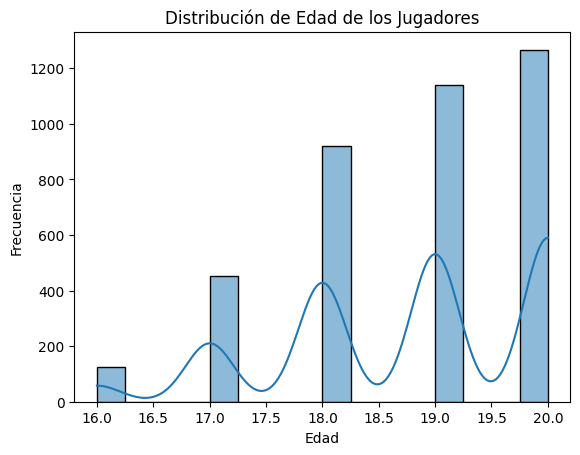

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Visualización de la distribución de edades
sns.histplot(jugadores['edad'], kde=True)
plt.title('Distribución de Edad de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Conclusiones de la Gráfica de Distribución de Edad de los Jugadores

La gráfica muestra la distribución de edades de los jugadores en el conjunto de datos. A continuación, se presentan algunas conclusiones y observaciones basadas en la visualización:

1. **Picos en Edades Específicas:**
   - Todos los jugadores tienen edades comprendidas entre 16 y 20 años, con picos notables a los 18, 19 y 20 años. Estos picos indican que hay más jugadores en estas edades específicas.

2. **Edad Promedio:**
   - La distribución parece tener una concentración significativa de jugadores en los 18, 19 y 20 años, lo que sugiere que la edad promedio de los jugadores en el conjunto de datos es relativamente joven.

3. **Dispersión de Edades:**
   - Hay una dispersión de edades desde los 16 hasta los 20 años, pero la mayoría de los jugadores se agrupan en los años mencionados anteriormente.

4. **Tendencias y Patrones:**
   - La curva de densidad muestra fluctuaciones significativas en la frecuencia de las edades, lo que podría indicar ciertas tendencias en la edad de los jugadores. Estas fluctuaciones podrían ser investigadas más a fondo para entender mejor las razones detrás de la distribución de edades.



## Gráfico Interactivo con Plotly: Relación entre Salario y Score

Este código crea un gráfico de dispersión interactivo utilizando Plotly para visualizar la relación entre el salario y el score de los jugadores, coloreando los puntos por equipo y mostrando el nombre del jugador al pasar el cursor sobre cada punto.

### Pasos del Proceso

1. **Importar Librerías Necesarias:**
   - Importa la librería `plotly.express`.


In [44]:
# Crear gráfico interactivo con Plotly
fig = px.scatter(
    jugadores,
    x='salario',
    y='score',
    color='equipo',
    hover_name='nombre',  # Nombre del jugador aparecerá al pasar el cursor sobre el punto
    title='Relación entre Salario y Score',
    labels={'salario': 'Salario', 'score': 'Score'}
)
fig.update_layout(showlegend=False, title={'x':0.5})

# Mostrar el gráfico
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Conclusiones de la Gráfica Interactiva: Relación entre Salario y Score

La gráfica de dispersión interactiva muestra la relación entre el salario y el score de los jugadores, con los puntos coloreados por equipo y los nombres de los jugadores visibles al pasar el cursor sobre ellos. A continuación se presentan algunas conclusiones y observaciones basadas en la visualización:

1. **Relación General:**
   - Hay una tendencia general donde los jugadores con salarios más altos tienden a tener un score más alto. Sin embargo, esta relación no es estricta, ya que hay jugadores con salarios bajos y scores altos, y viceversa.

2. **Dispersión de Salarios:**
   - La mayoría de los jugadores tienen salarios bajos (menos de 50k), con algunos pocos jugadores con salarios significativamente más altos. 

3. **Clusters de Jugadores:**
   - Se pueden identificar clusters de jugadores con salarios y scores similares. Esto podría indicar grupos de jugadores con características y desempeños comparables.

4. **Excepciones Notables:**
   - Hay excepciones notables en la gráfica, como jugadores con salarios muy altos (más de 100k) y scores elevados, que destacan del resto. Por ejemplo, J. Bellingham con un salario de 230k y un score de 88.

5. **Análisis por Equipo:**
   - Al colorear los puntos por equipo, se puede observar la dispersión de salarios y scores dentro de los equipos. Algunos equipos tienen una mayor variabilidad en salarios y scores que otros.


## Gráfico de Barras: Cantidad de Jugadores por Equipo (Top 20)

Este código cuenta la cantidad de jugadores por equipo y crea un gráfico de barras para visualizar los 20 equipos con mayor cantidad de jugadores.

### Pasos del Proceso

1. **Contar la Cantidad de Jugadores por Equipo:**
   - Utiliza `value_counts` de pandas para contar la cantidad de jugadores por equipo.
   - Convierte la serie resultante a un DataFrame y renombra las columnas.


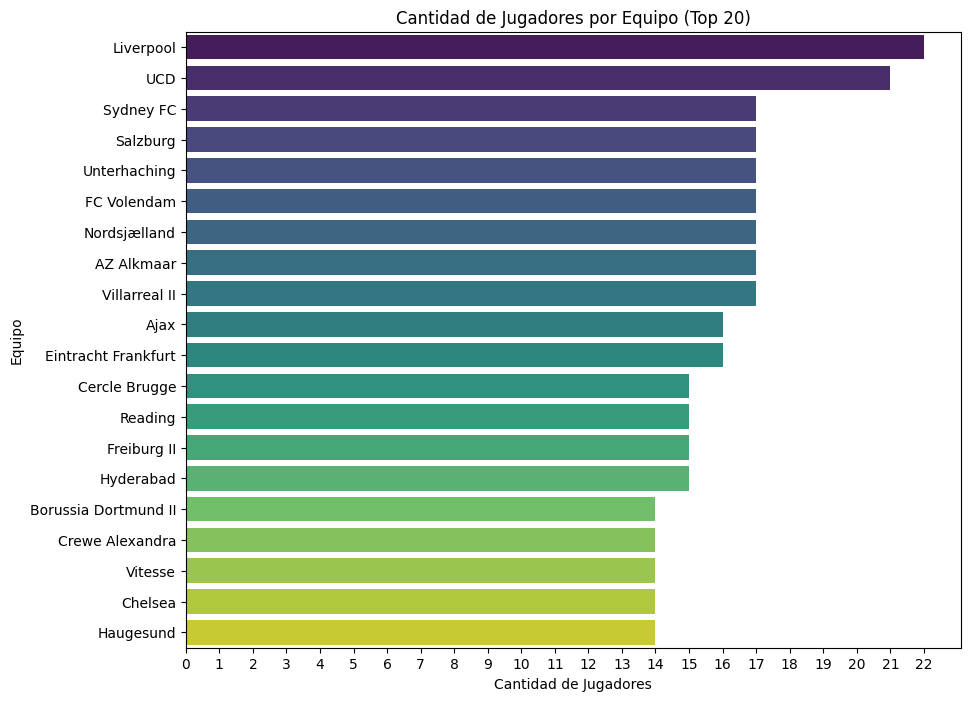

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'jugadores' es tu DataFrame
jugadores = pd.read_csv('/kaggle/input/youngtalents/jugadores.csv')

equipo_counts = jugadores['equipo'].value_counts().reset_index()
equipo_counts.columns = ['equipo', 'cantidad']

# Tomar los top 20 equipos con más jugadores
top_equipos = equipo_counts.head(20)

# Crear gráfico de barras con el uso recomendado de `hue` y sin leyenda
plt.figure(figsize=(10, 8))
sns.barplot(x='cantidad', y='equipo', data=top_equipos, dodge=False, palette='viridis')

plt.title('Cantidad de Jugadores por Equipo (Top 20)')
plt.xlabel('Cantidad de Jugadores')
plt.ylabel('Equipo')

# Asegurar que los ticks del eje X sean enteros
plt.xticks(range(0, int(top_equipos['cantidad'].max()) + 1, 1))

# Eliminar la leyenda para una visualización más limpia
plt.legend([],[], frameon=False)

plt.show()


## Conclusiones del Gráfico de Barras: Cantidad de Jugadores por Equipo (Top 20)

La gráfica de barras muestra la cantidad de jugadores por equipo para los 20 equipos con mayor cantidad de jugadores en el conjunto de datos. A continuación se presentan algunas conclusiones y observaciones basadas en la visualización:

1. **Equipos con Mayor Cantidad de Jugadores:**
   - **Liverpool** y **UCD** son los equipos con mayor cantidad de jugadores, seguidos de **Sydney FC**, **Salzburg**, y **Nordsjælland**. Estos equipos tienen entre 17 y 20 jugadores.

2. **Distribución de Jugadores:**
   - La cantidad de jugadores entre los equipos en el top 20 es relativamente alta y cercana, con todos los equipos teniendo entre 14 y 20 jugadores.

3. **Equipos Destacados:**
   - **FC Barcelona** y **Drogheda United** también están en el top 20, aunque con una cantidad de jugadores más baja en comparación con los equipos líderes.

4. **Variabilidad entre Equipos:**
   - La variabilidad en la cantidad de jugadores es notable, pero no hay grandes disparidades, lo que sugiere una distribución relativamente uniforme en este grupo.


## Visualización de la Distribución de Altura y Peso de los Jugadores

Este código crea visualizaciones para analizar la distribución de la altura y el peso de los jugadores, así como la relación entre altura y peso según la posición de los jugadores.

### Pasos del Proceso

1. **Distribución de la Altura:**
   - Utiliza `sns.histplot` de Seaborn para crear un histograma de la distribución de altura con una curva de densidad.
   - Configura los parámetros del histograma, como el color, el número de bins, y las etiquetas.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



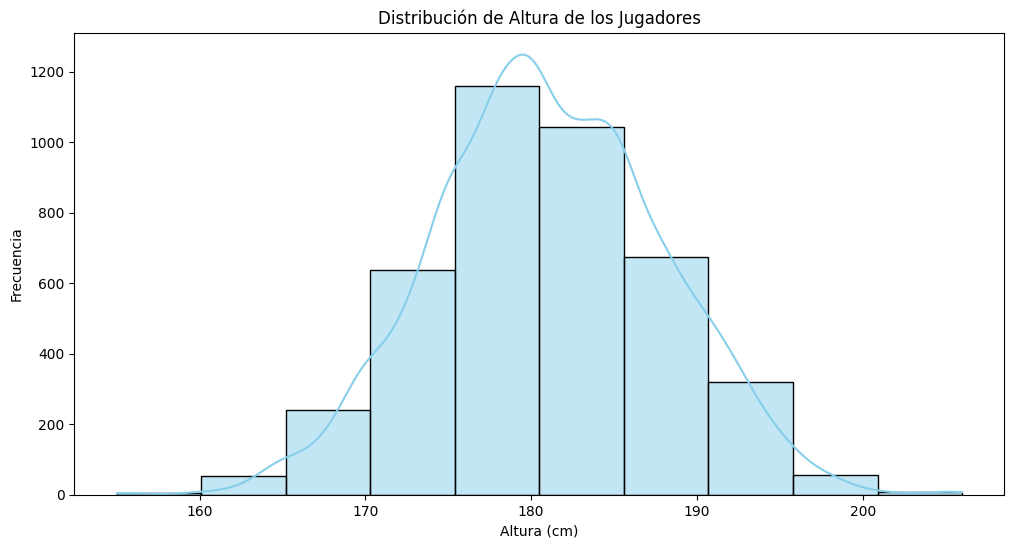

In [46]:
# Distribución de Altura
plt.figure(figsize=(12, 6))
sns.histplot(jugadores['altura'], kde=True, bins=10, color='skyblue')
plt.title('Distribución de Altura de los Jugadores')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()



## Conclusiones de la Gráfica de Distribución de Altura

La gráfica muestra la distribución de altura de los jugadores en el conjunto de datos. A continuación se presentan algunas conclusiones y observaciones basadas en la visualización:

1. **Distribución General:**
   - La mayoría de los jugadores tienen una altura entre 170 cm y 190 cm, con un pico alrededor de los 180 cm. Esta distribución sugiere que los jugadores tienden a tener una altura promedio dentro de este rango.

2. **Variabilidad de Alturas:**
   - Hay una dispersión de alturas que va desde aproximadamente 160 cm hasta más de 200 cm. Sin embargo, las alturas extremas (tanto las más bajas como las más altas) son menos frecuentes.

3. **Curva de Densidad:**
   - La curva de densidad muestra una distribución aproximadamente normal, con una ligera asimetría hacia la derecha, indicando que hay algunos jugadores con alturas significativamente mayores que el promedio.


### Pasos del Proceso

1. **Distribución de la Peso:**
   - Utiliza `sns.histplot` de Seaborn para crear un histograma de la distribución de altura con una curva de densidad.
   - Configura los parámetros del histograma, como el color, el número de bins, y las etiquetas.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



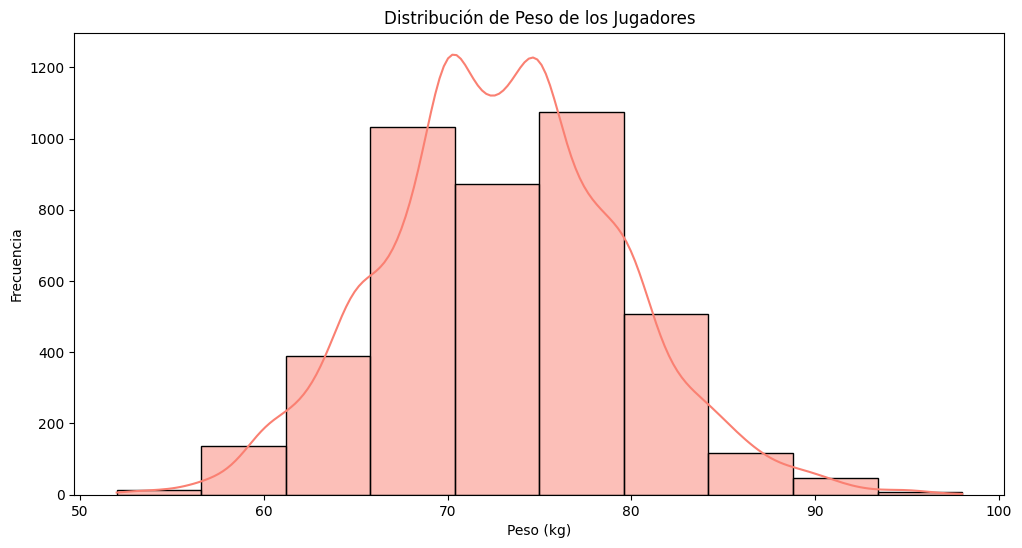

In [47]:
# Distribución de Peso
plt.figure(figsize=(12, 6))
sns.histplot(jugadores['peso'], kde=True, bins=10, color='salmon')
plt.title('Distribución de Peso de los Jugadores')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()



## Conclusiones de la Gráfica de Distribución de Peso

La gráfica muestra la distribución de peso de los jugadores en el conjunto de datos. A continuación se presentan algunas conclusiones y observaciones basadas en la visualización:

1. **Distribución General:**
   - La mayoría de los jugadores tienen un peso entre 60 kg y 80 kg, con un pico alrededor de los 70 kg. Esta distribución sugiere que los jugadores tienden a tener un peso promedio dentro de este rango.

2. **Variabilidad de Pesos:**
   - Hay una dispersión de pesos que va desde aproximadamente 50 kg hasta más de 90 kg. Sin embargo, los pesos extremos (tanto los más bajos como los más altos) son menos frecuentes.

3. **Curva de Densidad:**
   - La curva de densidad muestra una distribución aproximadamente normal, con una ligera asimetría hacia la derecha, indicando que hay algunos jugadores con pesos significativamente mayores que el promedio.


## Explicación del Código para Crear un Gráfico de Dispersión Interactivo

Este código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la altura y el peso de los jugadores, coloreando los puntos según el puesto de cada jugador.

### Pasos del Código

1. **Diccionario de Colores para Cada Puesto:**
   - Define un diccionario donde cada clave es un puesto y cada valor es un color. Estos colores se utilizarán para diferenciar visualmente los diferentes puestos en el gráfico.


In [48]:
# Diccionario de colores para cada puesto
colors = {
    'MCO': 'blue',
    'MD': 'green',
    'DC': 'red',
    'DFC': 'purple',
    'MCD': 'orange',
    'POR': 'black',
    'CAR': 'pink',
    'LI': 'yellow',
    'MC': 'cyan',
    'MI': 'magenta',
    'LD': 'brown',
    'EI': 'lime',
    'ED': 'navy',
    'SD': 'teal'
}

# Crear gráfico de dispersión interactivo
fig = px.scatter(jugadores, x='altura', y='peso', hover_name='nombre', color='puesto',
                 title='Relación entre Altura y Peso de los Jugadores por Puesto',
                 labels={'altura': 'Altura (cm)', 'peso': 'Peso (kg)'},
                 color_discrete_map=colors)
fig.update_layout(showlegend=False, title={'x':0.5})

fig.update_traces(marker=dict(size=10))  
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [49]:
# Definir colores para cada puesto
colores_puestos = {
    'MCO': 'green',
    'MD': 'cyan',
    'DC': 'red',
    'DFC': 'purple',
    'MCD': 'orange',
    'POR': 'brown',
    'CAR': 'pink',
    'LI': 'blue',
    'MC': 'blue',
    'MI': 'magenta',
    'LD': 'yellow',
    'EI': 'teal',
    'ED': 'coral',
    'SD': 'lime'
}


# Lista de habilidades
habilidades = ['centros', 'definicion', 'precision_cabeza', 'pases_cortos', 'voleas', 'regates',
               'efecto', 'precision_faltas', 'pases_largos', 'control_balon', 'aceleracion',
               'velocidad', 'agilidad', 'reflejos', 'equilibrio', 'potencia', 'salto', 'resistencia',
               'fuerza', 'tiros_lejanos', 'agresividad', 'intercepciones', 'vision', 'penaltis',
               'compostura', 'robos', 'ritmo', 'pase']

# Crear subplots en una cuadrícula de 15x2 y especificar los títulos con HTML para negrita y cursiva
fig = make_subplots(rows=15, cols=2,
                    subplot_titles=[f'<b><i>Distribución de {habilidad.capitalize()}</i></b>' for habilidad in habilidades])


# Añadir histogramas coloreados por puesto para cada habilidad
for i, habilidad in enumerate(habilidades, 1):
    for puesto in jugadores['puesto'].unique():
        fig.add_trace(
            go.Histogram(
                x=jugadores[jugadores['puesto'] == puesto][habilidad],
                nbinsx=10,
                name=f'{puesto} - {habilidad.capitalize()}',
                marker_color=colores_puestos.get(puesto, 'grey'),  # Usar 'grey' si el puesto no está en el diccionario
                opacity=0.75
            ),
            row=(i-1)//2+1, col=(i-1)%2+1
        )

# Actualizar el layout del gráfico
fig.update_layout(
    title_text='Distribución de las Habilidades de los Jugadores',
    barmode='overlay',
    height=3000,  # Ajustar la altura para acomodar todos los subplots
    width=1000,
    showlegend=False  # Ocultar la leyenda para evitar sobrecarga visual
)

# Actualizar los títulos de los ejes
fig.update_xaxes(title_text='Valor de Habilidad')
fig.update_yaxes(title_text='Frecuencia')

fig.show()

## Distribución de las Habilidades de los Jugadores

Este análisis proporciona una visualización detallada de cómo se distribuyen diferentes habilidades entre los jugadores, categorizadas por sus posiciones en el campo. Cada gráfica muestra la frecuencia de los valores de habilidades específicos y cómo estos varían según la posición del jugador.

### Observaciones Generales

1. **Distribución General de Habilidades:**
   - La mayoría de las habilidades tienen una distribución variada con algunos picos, lo que indica la presencia de jugadores con altos niveles en ciertas habilidades específicas.

2. **Comparación entre Posiciones:**
   - Las gráficas muestran cómo las diferentes posiciones tienden a tener valores característicos en ciertas habilidades. Por ejemplo, los delanteros pueden tener altas calificaciones en "definición" y "regates", mientras que los defensores pueden destacar en "intercepciones" y "robos".

### Detalle de Cada Habilidad

1. **Distribución de Centros:**
   - La habilidad de centros es crucial para jugadores en posiciones de ataque y mediocampo. Se observa una concentración de jugadores con valores medios a altos en esta habilidad.

2. **Distribución de Definición:**
   - Los delanteros tienden a tener valores altos en la habilidad de definición, lo cual es esencial para finalizar jugadas y marcar goles.

3. **Distribución de Precisión de Cabeza:**
   - Los defensores y delanteros altos suelen tener buenas calificaciones en precisión de cabeza, importante para ganar duelos aéreos.

4. **Distribución de Pases Cortos:**
   - Esta habilidad es fundamental para centrocampistas y defensores que necesitan mantener la posesión del balón y distribuirlo efectivamente.

5. **Distribución de Voleas:**
   - Jugadores en posiciones ofensivas muestran una mayor habilidad en voleas, crucial para finalizar jugadas con balones en el aire.

6. **Distribución de Regates:**
   - Los extremos y centrocampistas ofensivos tienden a destacar en regates, lo que les permite superar a defensores en situaciones uno a uno.

7. **Distribución de Efecto:**
   - La habilidad de efecto es importante para jugadores que toman tiros libres y centros, permitiendo curvas en la trayectoria del balón.

8. **Distribución de Precisión en Faltas:**
   - Esta habilidad es clave para jugadores encargados de tiros libres, mostrando una alta especialización en un grupo reducido de jugadores.

9. **Distribución de Pases Largos:**
   - Los defensores y centrocampistas con roles de creación de juego suelen tener altos valores en pases largos, facilitando cambios de juego efectivos.

10. **Distribución de Control del Balón:**
    - Una habilidad esencial para la mayoría de las posiciones, pero especialmente destacada en jugadores de mediocampo y ataque para mantener la posesión bajo presión.

11. **Distribución de Aceleración y Velocidad:**
    - Las posiciones de ataque y extremo requieren altos valores en aceleración y velocidad para desbordar defensores y generar oportunidades de gol.

12. **Distribución de Agilidad y Reflejos:**
    - Los porteros y defensores tienden a tener buenos reflejos, mientras que los jugadores de ataque y mediocampo requieren alta agilidad para cambios rápidos de dirección.

13. **Distribución de Equilibrio y Potencia:**
    - Jugadores con roles físicos, como defensores centrales y delanteros robustos, muestran altos valores en estas habilidades, proporcionando estabilidad y fuerza en el campo.

14. **Distribución de Salto y Resistencia:**
    - El salto es crucial para defensores y delanteros en duelos aéreos, mientras que la resistencia es importante para mantener un rendimiento constante durante todo el partido.

15. **Distribución de Fuerza y Tiros Lejanos:**
    - La fuerza es importante para defensores y delanteros, mientras que los tiros lejanos destacan en jugadores con capacidad para marcar desde fuera del área.

16. **Distribución de Mentalidad y Agresividad:**
    - La mentalidad alta es común en todas las posiciones, pero especialmente en defensores y centrocampistas que requieren concentración constante. La agresividad es clave en roles defensivos.

17. **Distribución de Intercepciones y Visión:**
    - Las intercepciones son cruciales para defensores, mientras que la visión es esencial para centrocampistas creativos que necesitan identificar y ejecutar pases claves.

18. **Distribución de Penaltis y Compostura:**
    - La habilidad para tomar penaltis es especializada, mientras que la compostura es importante para mantener el rendimiento bajo presión.

19. **Distribución de Robos, Ritmo y Pase:**
    - Los robos son vitales para defensores y mediocampistas defensivos, el ritmo para atacantes y extremos, y el pase para todas las posiciones, destacando en centrocampistas creativos.

### Conclusiones

Este análisis detallado proporciona una comprensión profunda de las características de los jugadores según sus posiciones y habilidades. Estas visualizaciones permiten identificar patrones y diferencias clave, ofreciendo información valiosa para entrenadores, analistas y gestores de equipos en la toma de decisiones estratégicas.


In [50]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_jugador            4200 non-null   int64  
 1   nombre                4200 non-null   object 
 2   edad                  4200 non-null   int64  
 3   score                 4200 non-null   int64  
 4   potencial             4200 non-null   int64  
 5   equipo                4200 non-null   object 
 6   contrato              4200 non-null   int64  
 7   altura                4200 non-null   int64  
 8   peso                  4200 non-null   float64
 9   pie_bueno             4200 non-null   object 
 10  general               4200 non-null   int64  
 11  puesto                3108 non-null   object 
 12  prog                  4200 non-null   int64  
 13  comienzo              4200 non-null   object 
 14  valor                 4200 non-null   float64
 15  salario              

## Explicación del Código para Crear un Gráfico de Dispersión Interactivo: Relación entre Velocidad y Regates

Este código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la velocidad y los regates de los jugadores, coloreando los puntos según el puesto de cada jugador.

### Pasos del Código

1. **Crear el Gráfico de Dispersión Interactivo:**
   - Utiliza `px.scatter` de Plotly Express para crear un gráfico de dispersión. Se especifican los ejes `x` y `y` como la velocidad y los regates de los jugadores, respectivamente.
   - El parámetro `color` asigna un color a cada punto basado en el puesto del jugador.
   - El parámetro `hover_data` se utiliza para mostrar el nombre del jugador al pasar el cursor sobre un punto.
   - Se añaden etiquetas y un título al gráfico.


In [51]:
# Crear gráfico de dispersión para ver la relación entre velocidad y regates
fig = px.scatter(jugadores, x='velocidad', y='regates', color='puesto', hover_data=['nombre'],
                 title='Relación entre Velocidad y Regates',
                 labels={'velocidad': 'Velocidad', 'regates': 'Regates'})

# Ocultar la leyenda y centrar el título
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones de la Relación entre Velocidad y Regates

El gráfico de dispersión muestra la relación entre las habilidades de velocidad y regates de los jugadores, con los puntos coloreados según el puesto de cada jugador. A continuación, se presentan las conclusiones derivadas de la visualización:

### Observaciones Generales

1. **Correlación Positiva:**
   - Existe una correlación positiva notable entre la velocidad y los regates. Los jugadores con altas habilidades de regates tienden también a tener alta velocidad.

2. **Distribución de Posiciones:**
   - Los puntos están distribuidos de manera bastante dispersa, pero se puede observar que ciertas posiciones tienden a concentrarse en diferentes rangos de habilidades:
     - **Extremos y Mediocampistas Ofensivos (MCO, EI, ED):** Estos jugadores suelen tener tanto alta velocidad como altos regates, lo cual es esencial para desbordar a los defensores y crear oportunidades de gol.
     - **Defensores (DFC, LD, LI):** Los defensores generalmente tienen menores habilidades de regates y varían más en la velocidad. La velocidad sigue siendo importante, pero los regates son menos cruciales en estas posiciones.
     - **Delanteros Centrales (DC):** Aunque algunos delanteros tienen altas habilidades en regates y velocidad, hay una variabilidad significativa, reflejando diferentes estilos de juego y roles en el ataque.

3. **Jugadores Destacados:**
   - Algunos jugadores como Nico Williams, que se destacan en ambos atributos, están claramente visibles en la esquina superior derecha del gráfico. Estos jugadores son valiosos por su capacidad para combinar velocidad y habilidad en el regate, siendo efectivos en ataques rápidos y en el uno contra uno.

### Conclusiones Específicas

1. **Importancia de las Habilidades Combinadas:**
   - La combinación de alta velocidad y regates es crucial para posiciones ofensivas que requieren desbordar defensas y generar oportunidades de gol. Los entrenadores deben considerar estos atributos al posicionar jugadores en roles ofensivos.

2. **Estrategias de Entrenamiento:**
   - Los jugadores en posiciones defensivas pueden beneficiarse de un enfoque en mejorar la velocidad, mientras que los ofensivos deben equilibrar el desarrollo tanto de velocidad como de regates.

3. **Identificación de Talentos:**
   - El análisis ayuda a identificar jugadores con un equilibrio excepcional en velocidad y regates, facilitando la selección de talentos que pueden desempeñarse bien en posiciones ofensivas y en transiciones rápidas.
   
### Recomendaciones

- **Desarrollo de Jugadores:**
  - Fomentar entrenamientos específicos que combinen velocidad y regates, especialmente para jugadores jóvenes en posiciones ofensivas.
- **Análisis de Oponentes:**
  - Utilizar la información sobre la relación entre velocidad y regates para planificar estrategias defensivas contra jugadores rápidos y habilidosos en el regate.
- **Toma de Decisiones en Fichajes:**
  - Considerar estas habilidades combinadas al evaluar posibles fichajes, asegurando que los jugadores se adapten a las necesidades tácticas del equipo.

Este análisis proporciona una base sólida para entender cómo la velocidad y los regates interactúan y afectan el rendimiento de los jugadores en el campo.








## Explicación del Código para Crear un Gráfico de Dispersión Interactivo: Relación entre Definición y Regates

Este código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre las habilidades de definición y regates de los jugadores, coloreando los puntos según el puesto de cada jugador.

### Pasos del Código

1. **Crear el Gráfico de Dispersión Interactivo:**
   - Utiliza `px.scatter` de Plotly Express para crear un gráfico de dispersión. Se especifican los ejes `x` y `y` como la definición y los regates de los jugadores, respectivamente.
   - El parámetro `color` asigna un color a cada punto basado en el puesto del jugador.
   - El parámetro `hover_data` se utiliza para mostrar el nombre del jugador al pasar el cursor sobre un punto.
   - Se añaden etiquetas y un título al gráfico.


In [52]:
# Crear gráfico de dispersión para ver la relación entre definición y regates
fig = px.scatter(jugadores, x='definicion', y='regates', color='puesto', hover_data=['nombre'],
                 title='Relación entre Definición y Regates',
                 labels={'definicion': 'Definición', 'regates': 'Regates'})

# Ocultar la leyenda y centrar el título
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones de la Relación entre Definición y Regates

El gráfico de dispersión muestra la relación entre las habilidades de definición y regates de los jugadores, con los puntos coloreados según el puesto de cada jugador. A continuación, se presentan las conclusiones derivadas de la visualización:

### Observaciones Generales

1. **Correlación Positiva:**
   - Existe una clara correlación positiva entre la definición y los regates. Los jugadores que tienen altos valores de regates también tienden a tener altos valores de definición.

2. **Distribución de Posiciones:**
   - Los puntos están distribuidos de manera que se pueden identificar diferentes grupos de jugadores según sus posiciones:
     - **Delanteros (DC) y Extremos (EI, ED):** Estos jugadores suelen tener altos valores tanto en definición como en regates, lo que es esencial para desbordar a los defensores y finalizar jugadas.
     - **Mediocampistas Ofensivos (MCO, MC):** También muestran altos valores en ambas habilidades, pero con una ligera variabilidad, reflejando su rol en la creación de juego y oportunidades de gol.
     - **Defensores y Porteros (DFC, POR):** Generalmente tienen menores habilidades de regates y definición, ya que estas no son cruciales para sus roles específicos en el campo.

3. **Jugadores Destacados:**
   - Jugadores como J. Bellingham, que se destacan en ambos atributos, están claramente visibles en la esquina superior derecha del gráfico. Estos jugadores son valiosos por su capacidad para combinar regates y definición, siendo efectivos en el uno contra uno y en situaciones de gol.

### Conclusiones Específicas

1. **Importancia de las Habilidades Combinadas:**
   - La combinación de altas habilidades de definición y regates es crucial para posiciones ofensivas que requieren tanto la creación de jugadas como la finalización efectiva. Los entrenadores deben considerar estos atributos al posicionar jugadores en roles ofensivos.

2. **Estrategias de Entrenamiento:**
   - Los jugadores en posiciones ofensivas pueden beneficiarse de entrenamientos que combinen ejercicios de regates y definición para mejorar su efectividad en el campo.

3. **Identificación de Talentos:**
   - El análisis ayuda a identificar jugadores con un equilibrio excepcional en regates y definición, facilitando la selección de talentos que pueden desempeñarse bien en posiciones ofensivas y en transiciones rápidas.

### Recomendaciones

- **Desarrollo de Jugadores:**
  - Fomentar entrenamientos específicos que combinen regates y definición, especialmente para jugadores jóvenes en posiciones ofensivas.
- **Análisis de Oponentes:**
  - Utilizar la información sobre la relación entre regates y definición para planificar estrategias defensivas contra jugadores habilidosos en el regate y efectivos en la definición.
- **Toma de Decisiones en Fichajes:**
  - Considerar estas habilidades combinadas al evaluar posibles fichajes, asegurando que los jugadores se adapten a las necesidades tácticas del equipo.

Este análisis proporciona una base sólida para entender cómo la definición y los regates interactúan y afectan el rendimiento de los jugadores en el campo.


## Explicación del Código para Crear un Gráfico de Dispersión Interactivo: Relación entre Aceleración y Velocidad

Este código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre las habilidades de aceleración y velocidad de los jugadores, coloreando los puntos según el puesto de cada jugador.

### Pasos del Código

1. **Crear el Gráfico de Dispersión Interactivo:**
   - Utiliza `px.scatter` de Plotly Express para crear un gráfico de dispersión. Se especifican los ejes `x` y `y` como la aceleración y la velocidad de los jugadores, respectivamente.
   - El parámetro `color` asigna un color a cada punto basado en el puesto del jugador.
   - El parámetro `hover_data` se utiliza para mostrar el nombre del jugador al pasar el cursor sobre un punto.
   - Se añaden etiquetas y un título al gráfico.

In [53]:
# Crear gráfico de dispersión para ver la relación entre aceleración y velocidad
fig = px.scatter(jugadores, x='aceleracion', y='velocidad', color='puesto', hover_data=['nombre'],
                 title='Relación entre Aceleración y Velocidad',
                 labels={'aceleracion': 'Aceleración', 'velocidad': 'Velocidad'})

# Ocultar la leyenda y centrar el título
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones de la Relación entre Aceleración y Velocidad

El gráfico de dispersión muestra la relación entre las habilidades de aceleración y velocidad de los jugadores, con los puntos coloreados según el puesto de cada jugador. A continuación, se presentan las conclusiones derivadas de la visualización:

### Observaciones Generales

1. **Correlación Positiva:**
   - Existe una clara correlación positiva entre la aceleración y la velocidad. Los jugadores que tienen altos valores de aceleración también tienden a tener altos valores de velocidad. Esto indica que estas dos habilidades están estrechamente relacionadas y suelen mejorar juntas.

2. **Distribución de Posiciones:**
   - Los puntos están distribuidos de manera que se pueden identificar diferentes grupos de jugadores según sus posiciones:
     - **Extremos y Delanteros (ED, EI, DC):** Estos jugadores suelen tener altos valores tanto en aceleración como en velocidad, lo cual es esencial para superar a los defensores y realizar desmarques rápidos.
     - **Mediocampistas Ofensivos (MCO):** También muestran altos valores en ambas habilidades, reflejando su rol en la creación de jugadas y su capacidad para cubrir rápidamente el terreno.
     - **Defensores Centrales y Porteros (DFC, POR):** Generalmente tienen menores habilidades de aceleración y velocidad, ya que estas no son tan cruciales para sus roles específicos en el campo.

3. **Jugadores Destacados:**
   - Jugadores como Nico Williams, que se destacan en ambos atributos, están claramente visibles en la esquina superior derecha del gráfico. Estos jugadores son valiosos por su capacidad para combinar aceleración y velocidad, siendo efectivos en transiciones rápidas y en situaciones de ataque.

### Conclusiones Específicas

1. **Importancia de las Habilidades Combinadas:**
   - La combinación de altas habilidades de aceleración y velocidad es crucial para posiciones ofensivas que requieren tanto desmarques rápidos como velocidad en la carrera. Los entrenadores deben considerar estos atributos al posicionar jugadores en roles ofensivos.

2. **Estrategias de Entrenamiento:**
   - Los jugadores en posiciones ofensivas pueden beneficiarse de entrenamientos que combinen ejercicios de aceleración y velocidad para mejorar su efectividad en el campo.

3. **Identificación de Talentos:**
   - El análisis ayuda a identificar jugadores con un equilibrio excepcional en aceleración y velocidad, facilitando la selección de talentos que pueden desempeñarse bien en posiciones ofensivas y en transiciones rápidas.

### Recomendaciones

- **Desarrollo de Jugadores:**
  - Fomentar entrenamientos específicos que combinen aceleración y velocidad, especialmente para jugadores jóvenes en posiciones ofensivas.
- **Análisis de Oponentes:**
  - Utilizar la información sobre la relación entre aceleración y velocidad para planificar estrategias defensivas contra jugadores habilidosos en el desmarque y en la carrera.
- **Toma de Decisiones en Fichajes:**
  - Considerar estas habilidades combinadas al evaluar posibles fichajes, asegurando que los jugadores se adapten a las necesidades tácticas del equipo.

Este análisis proporciona una base sólida para entender cómo la aceleración y la velocidad interactúan y afectan el rendimiento de los jugadores en el campo.


## Gráfico de Dispersión: Relación entre Fuerza y Tiros Lejanos

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la fuerza y los tiros lejanos de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre la fuerza y la habilidad en tiros lejanos.
   - Identificar si los jugadores con mayor fuerza tienden a tener mejores habilidades en tiros lejanos.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como delanteros o mediocampistas ofensivos, muestran una mayor tendencia a combinar fuerza y precisión en tiros lejanos.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas.


In [54]:
# Crear gráfico de dispersión para ver la relación entre fuerza y tiros lejanos
fig = px.scatter(jugadores, x='fuerza', y='tiros_lejanos', color='puesto', hover_data=['nombre'],
                 title='Relación entre Fuerza y Tiros Lejanos',
                 labels={'fuerza': 'Fuerza', 'tiros_lejanos': 'Tiros Lejanos'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Conclusiones del Gráfico: Relación entre Fuerza y Tiros Lejanos

1. **Distribución General:**
   - La mayoría de los jugadores se encuentran en el rango de 40 a 80 en la habilidad de tiros lejanos y de 30 a 70 en fuerza.
   - Hay una gran concentración de puntos en la parte media del gráfico, lo que indica que es común tener una combinación moderada de fuerza y habilidad en tiros lejanos.

2. **Variedad por Posición:**
   - Los puntos están coloreados según la posición de los jugadores, y se puede observar una distribución bastante dispersa en todas las posiciones.
   - Algunas posiciones, como los centrocampistas (MC) y los delanteros (DC), parecen tener una mayor variabilidad en estas habilidades.

3. **Relación entre Habilidades:**
   - No parece haber una correlación clara y lineal entre la fuerza y la habilidad en tiros lejanos. Los jugadores con alta fuerza no necesariamente tienen alta habilidad en tiros lejanos y viceversa.
   - Sin embargo, hay jugadores destacados, como J. Bellingham, que tienen altos valores en ambas habilidades, lo cual los hace sobresalir.

4. **Puntos Anómalos:**
   - Hay algunos puntos que sobresalen en la parte superior derecha del gráfico, indicando jugadores con habilidades muy altas en ambas categorías.
   - En la parte inferior del gráfico, se observan jugadores con alta fuerza pero baja habilidad en tiros lejanos, lo cual es menos común pero presente.

Este análisis puede ser útil para identificar a jugadores con combinaciones específicas de habilidades y para observar cómo se distribuyen estas habilidades entre diferentes posiciones en el campo.


## Gráfico de Dispersión: Relación entre Control de Balón y Pase Corto

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre el control de balón y los pases cortos de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre el control de balón y la habilidad en pases cortos.
   - Identificar si los jugadores con mejor control de balón tienden a tener mejores habilidades en pases cortos.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como mediocampistas ofensivos o extremos, muestran una mayor tendencia a combinar control de balón y precisión en pases cortos.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas.


In [55]:
# Crear gráfico de dispersión para ver la relación entre control de balón y pase corto
fig = px.scatter(jugadores, x='control_balon', y='pases_cortos', color='puesto', hover_data=['nombre'],
                 title='Relación entre Control de Balón y Pase Corto',
                 labels={'control_balon': 'Control de Balón', 'pases_cortos': 'Pases Cortos'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico: Relación entre Control de Balón y Pase Corto

### Observaciones Clave:

1. **Correlación Positiva:**
   - Existe una correlación positiva clara entre el control de balón y los pases cortos. A medida que el valor de control de balón aumenta, también lo hace la habilidad en pases cortos.

2. **Agrupación de Habilidades:**
   - Los jugadores con habilidades más altas en control de balón tienden a tener habilidades igualmente altas en pases cortos, lo que sugiere que estas dos habilidades están estrechamente relacionadas y son comunes en ciertos tipos de jugadores, como los mediocampistas ofensivos.

3. **Distribución por Posición:**
   - Aunque hay jugadores de todas las posiciones distribuidos a lo largo del gráfico, ciertos puestos como los mediocampistas ofensivos (MCO) y los extremos (ED y EI) tienden a agruparse en la parte superior derecha del gráfico, indicando altos valores en ambas habilidades.

4. **Identificación de Jugadores Destacados:**
   - Jugadores destacados como F. Wirtz, con valores máximos tanto en control de balón (90) como en pases cortos (90), son fácilmente identificables en el gráfico. Estos jugadores pueden ser clave para estrategias de juego que requieren precisión y control.

5. **Jugadores con Habilidades Variadas:**
   - Hay un grupo de jugadores con bajos valores en ambas habilidades, lo que puede representar jugadores de posiciones más defensivas o roles específicos que no requieren un alto control de balón ni habilidad en pases cortos.

### Aplicaciones Prácticas:

- **Entrenamiento y Desarrollo:**
  - Este análisis puede ser útil para entrenadores y cuerpos técnicos que deseen identificar áreas de mejora en jugadores específicos o que busquen potenciar ciertas habilidades en función de las necesidades del equipo.
  
- **Estrategia de Juego:**
  - La identificación de jugadores con altos valores en ambas habilidades puede ayudar en la creación de estrategias de juego que maximicen la posesión y el control del balón en el medio campo.

- **Scouting y Fichajes:**
  - Analistas y scouts pueden utilizar esta información para identificar y fichar jugadores que se ajusten a perfiles específicos necesarios para el equipo.


## Gráfico de Dispersión: Relación entre Definición y Voleas

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la habilidad de definición y la habilidad en voleas de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre las habilidades de definición y voleas.
   - Identificar si los jugadores con mejor definición tienden a tener mejores habilidades en voleas.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como delanteros o extremos, muestran una mayor tendencia a combinar buena definición con habilidad en voleas.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas en definición y voleas.


In [56]:
# Crear gráfico de dispersión para ver la relación entre definición y voleas
fig = px.scatter(jugadores, x='definicion', y='voleas', color='puesto', hover_data=['nombre'],
                 title='Relación entre Definición y Voleas',
                 labels={'definicion': 'Definición', 'voleas': 'Voleas'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico: Relación entre Definición y Voleas

1. **Correlación Positiva:**
   - Existe una correlación positiva evidente entre la habilidad de definición y la habilidad en voleas de los jugadores.
   - Los jugadores con una mejor habilidad de definición tienden a tener también mejores habilidades en voleas.

2. **Distribución por Posiciones:**
   - Diferentes posiciones de jugadores están distribuidas a lo largo del gráfico, indicando que tanto delanteros como mediocampistas ofensivos tienden a combinar habilidades en definición y voleas.
   - Es notable cómo los delanteros centrales (DC) y mediocampistas ofensivos (MCO) dominan la parte superior derecha del gráfico, indicando altos valores en ambas habilidades.

3. **Identificación de Jugadores Destacados:**
   - Se pueden identificar claramente jugadores que destacan en ambas habilidades, como E. Wahi, que muestra altos valores tanto en definición como en voleas.
   - Esta visualización es útil para entrenadores y analistas que buscan jugadores con habilidades específicas en estas dos áreas clave del juego ofensivo.


## Gráfico de Dispersión: Relación entre Pase Largo y Pase Corto

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la habilidad de pase largo y pase corto de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre la habilidad de pase largo y pase corto.
   - Identificar si los jugadores con buenas habilidades en pase corto también tienden a tener buenas habilidades en pase largo.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como mediocampistas y defensores, muestran una mayor tendencia a combinar habilidades en pases largos y cortos.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas en el control del balón y la precisión en los pases.


In [57]:
# Crear gráfico de dispersión para ver la relación entre pase largo y pase corto
fig = px.scatter(jugadores, x='pases_largos', y='pases_cortos', color='puesto', hover_data=['nombre'],
                 title='Relación entre Pase Largo y Pase Corto',
                 labels={'pases_largos': 'Pase Largo', 'pases_cortos': 'Pase Corto'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico de Dispersión: Relación entre Pase Largo y Pase Corto

### Observaciones Generales:
- Existe una clara correlación positiva entre la habilidad de pase largo y pase corto de los jugadores. Esto indica que los jugadores que son buenos en pases cortos tienden también a ser buenos en pases largos.
- La mayoría de los puntos se agrupan en una diagonal ascendente desde la esquina inferior izquierda (bajas habilidades en ambos tipos de pase) hasta la esquina superior derecha (altas habilidades en ambos tipos de pase).

### Distribución por Posiciones:
- Se observa una amplia dispersión de puntos de diferentes colores a lo largo de la diagonal, lo que sugiere que jugadores de diversas posiciones tienen habilidades variadas en pases largos y cortos.
- Posiciones como mediocampistas (MC) y mediocampistas ofensivos (MCO) tienden a mostrar habilidades más equilibradas y altas en ambas categorías.

### Identificación de Jugadores Destacados:
- Jugadores que se encuentran en la parte superior derecha del gráfico, como J. Bellingham (MC), destacan por tener habilidades sobresalientes tanto en pase largo como en pase corto.
- Estos jugadores pueden ser de gran valor para equipos que buscan una distribución de balón efectiva y versátil en el campo.

### Conclusión:
- El gráfico confirma la hipótesis de que existe una correlación significativa entre las habilidades de pase largo y corto en los jugadores.
- Esta información puede ser útil para entrenadores y analistas al evaluar y seleccionar jugadores para roles específicos que requieren habilidades equilibradas en la distribución del balón.


## Gráfico de Dispersión: Relación entre Agresividad y Robos

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la agresividad y los robos de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre la agresividad y la habilidad en robos.
   - Identificar si los jugadores con mayor agresividad tienden a realizar más robos.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como defensores o mediocampistas defensivos, muestran una mayor tendencia a combinar agresividad y habilidades de robo.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas.


In [58]:
# Crear gráfico de dispersión para ver la relación entre agresividad y robos
fig = px.scatter(jugadores, x='agresividad', y='robos', color='puesto', hover_data=['nombre'],
                 title='Relación entre Agresividad y Robos',
                 labels={'agresividad': 'Agresividad', 'robos': 'Robos'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico: Relación entre Agresividad y Robos

El gráfico de dispersión muestra la relación entre la agresividad y los robos de los jugadores, con cada punto representando a un jugador y el color indicando su posición en el campo. Aquí están las conclusiones principales:

1. **Correlación Positiva:**
   - Existe una clara correlación positiva entre la agresividad y los robos. A medida que aumenta la agresividad, también tiende a aumentar la cantidad de robos realizados por los jugadores.
   - Esto sugiere que los jugadores más agresivos tienen una mayor propensión a realizar robos efectivos.

2. **Distribución por Posiciones:**
   - Los jugadores de diferentes posiciones se distribuyen a lo largo del gráfico, pero parece que los defensores y mediocampistas defensivos tienden a tener valores más altos tanto en agresividad como en robos.
   - Los jugadores de ataque, como delanteros y extremos, muestran una menor concentración en la parte superior derecha del gráfico, lo que indica menores valores en estas habilidades.

3. **Identificación de Jugadores Destacados:**
   - Jugadores como E. Camavinga, que aparece en la esquina superior derecha del gráfico, destacan por tener altos valores tanto en agresividad como en robos.
   - Esta información puede ser útil para entrenadores y analistas al buscar jugadores que combinan estas dos habilidades clave.

4. **Variabilidad entre Jugadores:**
   - A pesar de la tendencia general, hay una considerable variabilidad entre los jugadores, con algunos mostrando altos niveles de una habilidad pero no necesariamente de la otra.
   - Este análisis resalta la importancia de considerar múltiples métricas al evaluar las habilidades de los jugadores.

En resumen, el gráfico proporciona una visión clara de cómo la agresividad y los robos están relacionados y cómo estas habilidades varían entre las diferentes posiciones en el campo.


## Gráfico de Dispersión: Relación entre Resistencia y Ritmo

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la resistencia y el ritmo de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre la resistencia y el ritmo.
   - Identificar si los jugadores con mayor resistencia tienden a tener un mejor ritmo.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como los extremos y los mediocampistas, muestran una mayor tendencia a combinar resistencia y ritmo.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas.


In [59]:
# Crear gráfico de dispersión para ver la relación entre resistencia y ritmo
fig = px.scatter(jugadores, x='resistencia', y='ritmo', color='puesto', hover_data=['nombre'],
                 title='Relación entre Resistencia y Ritmo',
                 labels={'resistencia': 'Resistencia', 'ritmo': 'Ritmo'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico: Relación entre Resistencia y Ritmo

El gráfico de dispersión muestra la relación entre la resistencia y el ritmo de los jugadores. A continuación se presentan las principales conclusiones extraídas de la visualización:

1. **Distribución General:**
   - Existe una amplia variedad en la combinación de resistencia y ritmo entre los jugadores.
   - Se observa una densidad más alta de jugadores con resistencia entre 40 y 80, y ritmo entre 60 y 80.

2. **Patrones por Posición:**
   - Jugadores en ciertas posiciones, como extremos y laterales, tienden a tener valores más altos en ambas métricas.
   - Los jugadores defensivos (centrales) y porteros suelen tener menor ritmo, independientemente de su resistencia.

3. **Jugadores Destacados:**
   - Los jugadores con alta resistencia y alto ritmo son menos comunes, pero destacan en el gráfico.
   - Identificar estos jugadores puede ser valioso para tácticas que requieran alta resistencia y ritmo, como presión alta y transiciones rápidas.

4. **Correlación Positiva:**
   - En general, parece haber una correlación positiva entre la resistencia y el ritmo, lo que sugiere que los jugadores que entrenan para mejorar su resistencia también tienden a mejorar su ritmo.

Estas conclusiones pueden ayudar a los entrenadores y analistas a identificar patrones y tomar decisiones informadas sobre la selección y entrenamiento de jugadores.


## Gráfico de Dispersión: Relación entre Precisión de Cabeza y Salto

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la precisión de cabeza y el salto de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre la precisión de cabeza y la habilidad de salto.
   - Identificar si los jugadores con mejor capacidad de salto tienden a tener mejor precisión de cabeza.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como defensores centrales y delanteros, muestran una mayor tendencia a combinar precisión de cabeza y capacidad de salto.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas.


In [60]:
# Crear gráfico de dispersión para ver la relación entre precisión de cabeza y salto
fig = px.scatter(jugadores, x='precision_cabeza', y='salto', color='puesto', hover_data=['nombre'],
                 title='Relación entre Precisión de Cabeza y Salto',
                 labels={'precision_cabeza': 'Precisión de Cabeza', 'salto': 'Salto'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico de Dispersión: Relación entre Precisión de Cabeza y Salto

El gráfico de dispersión muestra la relación entre la precisión de cabeza y la capacidad de salto de los jugadores en nuestro conjunto de datos. Aquí se presentan las conclusiones más relevantes:

1. **Correlación Positiva:**
   - Existe una correlación positiva entre la precisión de cabeza y el salto. A medida que aumenta la capacidad de salto, también tiende a aumentar la precisión de cabeza.
   - Esta tendencia es visible a lo largo de todas las posiciones, lo que sugiere que ambas habilidades están estrechamente relacionadas.

2. **Distribución por Posiciones:**
   - Jugadores en la posición de delantero centro (DC) tienden a tener altas calificaciones tanto en precisión de cabeza como en salto.
   - Posiciones como defensores centrales (DFC) y otros roles defensivos también muestran una distribución similar, aunque con menor densidad en las calificaciones más altas.

3. **Identificación de Jugadores Destacados:**
   - Jugadores como **R. Durosinmi** se destacan con una alta precisión de cabeza (81) y una excelente capacidad de salto (93).
   - Estos jugadores son valiosos en situaciones de juego aéreo, como tiros de esquina o centros al área, donde se requiere una combinación de ambas habilidades.

En resumen, el gráfico proporciona una visualización clara de cómo se relacionan la precisión de cabeza y el salto, y destaca a jugadores específicos que sobresalen en ambas áreas.


## Gráfico de Dispersión: Relación entre Visión y Pase

El siguiente código crea un gráfico de dispersión interactivo utilizando Plotly Express para visualizar la relación entre la visión y la capacidad de pase de los jugadores en nuestro conjunto de datos. Cada punto en el gráfico representa a un jugador, con el color del punto indicando su posición en el campo.

### Objetivos del Gráfico:

1. **Visualizar Correlaciones:**
   - Permitir la observación de posibles correlaciones entre la visión y la capacidad de pase.
   - Identificar si los jugadores con mejor visión tienden a tener también una mejor capacidad de pase.

2. **Distribución por Posiciones:**
   - Analizar cómo se distribuyen estas habilidades entre diferentes posiciones de jugadores.
   - Verificar si ciertas posiciones, como mediocampistas ofensivos o creativos, muestran una mayor tendencia a combinar buena visión y precisión en el pase.

3. **Identificación de Jugadores Destacados:**
   - Facilitar la identificación de jugadores que destacan en ambas habilidades.
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar jugadores con habilidades específicas en visión y pase.


In [61]:
# Crear gráfico de dispersión para ver la relación entre visión y pase
fig = px.scatter(jugadores, x='vision', y='pase', color='puesto', hover_data=['nombre'],
                 title='Relación entre Visión y Pase',
                 labels={'vision': 'Visión', 'pase': 'Pase'})

# Ocultar la leyenda
fig.update_layout(showlegend=False, title={'x':0.5})

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusiones del Gráfico: Relación entre Visión y Pase

El gráfico de dispersión muestra la relación entre las habilidades de visión y pase de los jugadores. Aquí están las conclusiones principales:

1. **Correlación Positiva:**
   - Existe una clara correlación positiva entre la visión y la capacidad de pase. Los jugadores con mejor visión tienden a tener también una mejor capacidad de pase.

2. **Distribución por Posiciones:**
   - La mayoría de los jugadores se agrupan en el rango medio de ambas habilidades.
   - Los mediocampistas ofensivos (MCO) tienden a tener las puntuaciones más altas en ambas habilidades, lo que indica su rol crucial en la creación de jugadas y distribución del balón.

3. **Jugadores Destacados:**
   - Florian Wirtz, etiquetado como MCO, se destaca con una visión de 90 y una capacidad de pase de 86, situándose en la esquina superior derecha del gráfico. Esto lo identifica como un jugador excepcional en ambas habilidades.

Estas observaciones pueden ser útiles para entrenadores y analistas al evaluar las capacidades de los jugadores en términos de su visión y habilidad de pase, identificando a aquellos que sobresalen en la creación de jugadas y distribución del balón.


## Mapa de Calor de Correlación entre Habilidades Significativas de Jugadores

El siguiente código crea un mapa de calor interactivo utilizando Plotly Express para visualizar la matriz de correlación entre las habilidades más significativas de los jugadores. Las habilidades seleccionadas incluyen centros, definición, precisión de cabeza, pases cortos, regates, efecto, pases largos, control del balón, aceleración, velocidad, agilidad, potencia, resistencia, fuerza, visión, compostura, robos, ritmo, pase y tiros lejanos.

### Objetivos del Gráfico:

1. **Identificar Relaciones Entre Habilidades:**
   - Observar cómo se correlacionan las diferentes habilidades entre sí.
   - Identificar pares de habilidades que tienden a aumentar o disminuir juntas.

2. **Análisis de Desempeño:**
   - Evaluar cuáles habilidades tienen una mayor influencia en otras.
   - Utilizar la matriz de correlación para entender cómo una mejora en una habilidad puede afectar otras habilidades.

3. **Toma de Decisiones:**
   - Proporcionar una herramienta visual para entrenadores y analistas que deseen identificar áreas clave para mejorar en el entrenamiento de los jugadores.
   - Facilitar la identificación de habilidades que son críticas para el desarrollo y desempeño de los jugadores.

### Interpretación del Mapa de Calor:

- **Colores:**
  - Los colores varían desde el rojo (correlación negativa) hasta el azul (correlación positiva), pasando por el blanco (sin correlación).
  - Los colores más oscuros indican una correlación más fuerte, ya sea positiva o negativa.
  
- **Ejes:**
  - Los ejes representan las habilidades seleccionadas.
  - La intersección de cada par de habilidades muestra el coeficiente de correlación entre ellas.

Este mapa de calor es una herramienta poderosa para analizar las interrelaciones entre las habilidades de los jugadores y puede ayudar a optimizar los planes de entrenamiento y estrategias de juego.


In [62]:
# Definir las habilidades más significativas
habilidades_significativas = [
    'centros', 'definicion', 'precision_cabeza', 'pases_cortos',
    'regates', 'efecto', 'pases_largos', 'control_balon', 
    'aceleracion', 'velocidad', 'agilidad', 'potencia', 
    'resistencia', 'fuerza', 'vision', 'compostura', 
    'robos', 'ritmo', 'pase', 'tiros_lejanos'
]

# Filtrar el DataFrame para incluir solo las habilidades seleccionadas
jugadores_significativos = jugadores[habilidades_significativas]

# Calcular la matriz de correlación
correlation_matrix_significativas = jugadores_significativos.corr()

# Crear mapa de calor interactivo
fig = px.imshow(correlation_matrix_significativas, 
                labels=dict(color="Correlación"), 
                x=correlation_matrix_significativas.columns, 
                y=correlation_matrix_significativas.columns,
                color_continuous_scale='RdBu_r', 
                zmin=-1, zmax=1,
                title="Mapa de Calor de Correlación entre Habilidades Significativas de Jugadores")

fig.update_layout(title_x=0.5, width=800, height=800)
fig.show()


## Conclusiones de la Matriz de Correlación entre Habilidades Significativas

El siguiente mapa de calor muestra la matriz de correlación entre las habilidades más significativas de los jugadores. A continuación, se presentan algunas conclusiones clave obtenidas del análisis de esta matriz:

### Conclusiones Principales:

1. **Correlaciones Fuertes Positivas:**
   - **Pases Cortos y Control de Balón:** Existe una alta correlación positiva, lo que indica que los jugadores con buen control de balón tienden a tener habilidades superiores en pases cortos.
   - **Definición y Voleas:** Estas habilidades están altamente correlacionadas, sugiriendo que los jugadores que son buenos en la definición de jugadas también tienden a ser hábiles en los tiros de volea.
   - **Aceleración y Velocidad:** La fuerte correlación positiva entre estas habilidades indica que los jugadores rápidos también tienden a tener una buena aceleración.

2. **Correlaciones Negativas o Bajas:**
   - **Fuerza y Pases Cortos:** Se observa una baja o nula correlación, indicando que estas habilidades no están significativamente relacionadas.
   - **Resistencia y Control de Balón:** La correlación es baja, sugiriendo que tener una alta resistencia no necesariamente implica tener un buen control del balón.

3. **Patrones Generales:**
   - **Habilidades Ofensivas:** Habilidades como regates, tiros lejanos, y visión tienden a correlacionarse positivamente entre sí, indicando que los jugadores ofensivos suelen ser buenos en múltiples aspectos del juego ofensivo.
   - **Habilidades Defensivas:** Habilidades como robos y fuerza muestran correlaciones positivas, sugiriendo que los jugadores defensivos tienden a ser más agresivos y fuertes.

### Uso Práctico:

- **Optimización del Entrenamiento:** Este análisis puede ayudar a los entrenadores a diseñar programas de entrenamiento más efectivos, centrándose en desarrollar habilidades que están altamente correlacionadas para mejorar el rendimiento general del jugador.
- **Identificación de Talentos:** Los scouts pueden usar esta información para identificar jugadores que destacan en habilidades clave y que probablemente tengan potencial en múltiples áreas del juego.
- **Desarrollo de Estrategias:** Comprender estas correlaciones permite a los analistas y estrategas desarrollar tácticas que maximicen las fortalezas de los jugadores en función de sus habilidades correlacionadas.

En resumen, este mapa de calor proporciona una visión integral de cómo las diferentes habilidades de los jugadores están interrelacionadas, ofreciendo información valiosa para mejorar el entrenamiento, la identificación de talentos y la planificación estratégica.


# Preparación de Datos para Modelado

El siguiente código muestra cómo se preparan los datos de los jugadores para el modelado, incluyendo la transformación de variables categóricas y la normalización de características numéricas. Este paso es crucial para asegurar que los datos sean adecuados para la aplicación de algoritmos de machine learning.

### Pasos del Código:

1. **Carga de Datos:**
   - Se cargan los datos de los jugadores desde un archivo CSV llamado 'jugadores_imputados.csv'.

2. **Transformación de Variables Categóricas:**
   - Las columnas categóricas ('equipo', 'pie_bueno', 'puesto', 'comienzo') se convierten en numéricas utilizando `LabelEncoder` de `sklearn`. Esto es necesario para que los algoritmos de machine learning puedan procesar estos datos.

3. **Normalización de Características Numéricas:**
   - Las características numéricas se escalan utilizando `StandardScaler` de `sklearn`. La normalización se realiza para que todas las características numéricas tengan una media de 0 y una desviación estándar de 1. Esto ayuda a mejorar el rendimiento de muchos algoritmos de machine learning.

4. **Creación de un DataFrame con los Datos Normalizados:**
   - Se crea un nuevo DataFrame que contiene las características numéricas normalizadas.
.

## Preparacion de los datos

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar los datos
jugadores = pd.read_csv('jugadores_imputados.csv')

# Convertir columnas categóricas a numéricas
label_encoders = {}
categorical_columns = ['equipo', 'pie_bueno', 'puesto', 'comienzo']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    jugadores[col] = label_encoders[col].fit_transform(jugadores[col])

# Normalizar las características numéricas
scaler = StandardScaler()
jugadores_scaled = scaler.fit_transform(jugadores.drop(columns=['id_jugador', 'nombre', 'rendimiento_ofensivo']))

# Crear un DataFrame con los datos normalizados
jugadores_scaled_df = pd.DataFrame(jugadores_scaled, columns=jugadores.drop(columns=['id_jugador', 'nombre', 'rendimiento_ofensivo']).columns)


## Detección de Anomalías con Isolation Forest

En el siguiente código, se utiliza el algoritmo de `Isolation Forest` de `sklearn` para detectar anomalías en el conjunto de datos de los jugadores. `Isolation Forest` es un método basado en árboles de decisión que identifica puntos de datos inusuales en el conjunto de datos.

### Pasos del Código:

1. **Entrenamiento del Modelo de Isolation Forest:**
   - Se entrena un modelo de `Isolation Forest` con un nivel de contaminación del 2% (`contamination=0.02`), lo que indica que esperamos que el 2% de los datos sean anomalías.

2. **Predicción de Anomalías:**
   - El modelo predice si cada punto de datos es una anomalía (`-1`) o no (`1`).
   - Se convierte esta predicción a una columna llamada `anomaly` donde `1` indica una anomalía y `0` indica un punto de datos normal.

3. **Identificación de Anomalías:**
   - Se filtran los jugadores que han sido marcados como anomalías.
   - Se imprime el número de anomalías detectadas y se muestran los datos correspondientes.


In [64]:
from sklearn.ensemble import IsolationForest

# Entrenar el modelo de Isolation Forest
model = IsolationForest(contamination=0.02, random_state=42)
jugadores['anomaly'] = model.fit_predict(jugadores_scaled_df)

# Marcar las anomalías
jugadores['anomaly'] = jugadores['anomaly'].map({1: 0, -1: 1})
anomalies = jugadores[jugadores['anomaly'] == 1]

print(f'Número de anomalías detectadas: {len(anomalies)}')
print(anomalies)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Número de anomalías detectadas: 78
      id_jugador          nombre  edad  score  potencial  equipo  contrato  \
149          149       D. Seimen    17     61         84     596      2027   
276          276  W. Zaïre-Emery    17     80         90     418      2029   
527          647      M. Penders    17     64         82     236      2028   
647          767      M. Penders    18     64         82     236      2028   
795          915            Gavi    18     83         90     209      2026   
...          ...             ...   ...    ...        ...     ...       ...   
3809        4049       Z. Suzuki    20     68         77     518      2027   
3822        4062        B. Šeško    20     78         87     445      2028   
3860        4100        Y. Musah    20     75         83     361      2028   
3864        4104       C. Lukeba    20     79         86     445      2028   
3889        4129       D. Udogie    20     81         86     569      2030   

      altura  peso  pie_buen

## Visualización de Anomalías usando PCA y Isolation Forest

En el siguiente código, se utiliza Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos y visualizar las anomalías detectadas por el modelo `Isolation Forest`.

### Pasos del Código:

1. **Reducción de Dimensionalidad con PCA:**
   - Se aplica `PCA` para reducir las características de los datos normalizados a 2 componentes principales, facilitando la visualización en 2D.

2. **Asignación de Componentes Principales:**
   - Se añaden las dos primeras componentes principales (`pca1` y `pca2`) al DataFrame de jugadores.

3. **Visualización de Anomalías:**
   - Se crea un gráfico de dispersión utilizando `seaborn` para visualizar los jugadores en el espacio de las dos componentes principales.
   - Los jugadores marcados como anomalías se colorean en rojo, mientras que los jugadores normales se colorean en azul.


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
jugadores_pca = pca.fit_transform(jugadores_scaled_df)

# Suponiendo que tienes el DataFrame 'jugadores' previamente definido
jugadores['pca1'] = jugadores_pca[:, 0]
jugadores['pca2'] = jugadores_pca[:, 1]

# Crear gráfico interactivo con Plotly
fig = px.scatter(
    jugadores,
    x='pca1',
    y='pca2',
    color='anomaly',
    title='Detección de Anomalías con Isolation Forest',
    labels={
        'pca1': 'Componente Principal 1',
        'pca2': 'Componente Principal 2',
        'anomaly': 'Anomalía'
    },
    color_continuous_scale=['blue', 'red']  # Esto solo funciona si 'anomaly' es continua
)
fig.update_layout(title_x=0.5)
fig.show()

## Detección de Anomalías con Isolation Forest

El gráfico de dispersión anterior utiliza el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de las características de los jugadores y visualizar las anomalías detectadas por el modelo `Isolation Forest`. En este gráfico, cada punto representa a un jugador, con el color indicando si el jugador es considerado una anomalía (rojo) o no (azul).

### Conclusiones del Gráfico:

1. **Separación de Anomalías:**
   - Las anomalías (puntos rojos) se encuentran principalmente en las regiones periféricas del gráfico, lo que indica que tienen características diferentes de las de los jugadores normales.
   - Existen dos grupos principales de puntos: uno más denso y compacto en la parte izquierda, y otro más disperso en la parte derecha. Las anomalías tienden a estar en los bordes de estos grupos.

2. **Distribución de Jugadores:**
   - La mayoría de los jugadores se encuentran agrupados en el centro del gráfico, lo que sugiere que comparten características similares.
   - La distribución sugiere que los jugadores normales forman un grupo relativamente homogéneo, mientras que las anomalías están más dispersas y alejadas del centro.

3. **Utilidad del PCA:**
   - El PCA ha permitido una reducción efectiva de la dimensionalidad, manteniendo la variabilidad suficiente para distinguir entre jugadores normales y anomalías.
   - Esta visualización facilita la identificación de patrones y estructuras en los datos, así como la detección de puntos atípicos que pueden requerir un análisis más detallado.

### Implicaciones:

- **Análisis de Desempeño:**
  - Los analistas y entrenadores pueden utilizar esta visualización para identificar jugadores cuyas características se desvían significativamente del resto, lo que podría indicar talento excepcional o necesidad de mejora.

- **Mejora de Modelos:**
  - Esta información puede ser útil para refinar modelos predictivos y mejorar la detección de jugadores con potencial oculto o que requieran atención especial en su entrenamiento.

El gráfico proporciona una herramienta poderosa para el análisis visual de datos complejos, permitiendo a los analistas deportivos tomar decisiones más informadas basadas en la detección de anomalías.


In [66]:
import plotly.express as px
import plotly.graph_objects as go

# Reducir dimensionalidad para visualización usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
jugadores_pca = pca.fit_transform(jugadores_scaled_df)

# Crear DataFrame para visualización
jugadores['pca1'] = jugadores_pca[:, 0]
jugadores['pca2'] = jugadores_pca[:, 1]

# Visualización de las anomalías
fig = px.scatter(jugadores, x='pca1', y='pca2', color='anomaly', 
                 title='Visualización de Anomalías con PCA',
                 labels={'pca1': 'Componente Principal 1', 'pca2': 'Componente Principal 2'},
                 color_continuous_scale=['blue', 'red'])

fig.update_layout(title_x=0.5)
fig.show()


## Visualización de Anomalías con PCA

El gráfico de dispersión anterior utiliza el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de las características de los jugadores y visualizar las anomalías detectadas por el modelo `Isolation Forest`. En este gráfico, cada punto representa a un jugador, con el color indicando si el jugador es considerado una anomalía (rojo) o no (azul).

### Conclusiones del Gráfico:

1. **Separación de Anomalías:**
   - Las anomalías (puntos rojos) se encuentran principalmente en las regiones periféricas del gráfico, lo que indica que tienen características diferentes de las de los jugadores normales.
   - Existen dos grupos principales de puntos: uno más denso y compacto en la parte izquierda, y otro más disperso en la parte derecha. Las anomalías tienden a estar en los bordes de estos grupos.

2. **Distribución de Jugadores:**
   - La mayoría de los jugadores se encuentran agrupados en el centro del gráfico, lo que sugiere que comparten características similares.
   - La distribución sugiere que los jugadores normales forman un grupo relativamente homogéneo, mientras que las anomalías están más dispersas y alejadas del centro.

3. **Utilidad del PCA:**
   - El PCA ha permitido una reducción efectiva de la dimensionalidad, manteniendo la variabilidad suficiente para distinguir entre jugadores normales y anomalías.
   - Esta visualización facilita la identificación de patrones y estructuras en los datos, así como la detección de puntos atípicos que pueden requerir un análisis más detallado.

### Implicaciones:

- **Análisis de Desempeño:**
  - Los analistas y entrenadores pueden utilizar esta visualización para identificar jugadores cuyas características se desvían significativamente del resto, lo que podría indicar talento excepcional o necesidad de mejora.

- **Mejora de Modelos:**
  - Esta información puede ser útil para refinar modelos predictivos y mejorar la detección de jugadores con potencial oculto o que requieran atención especial en su entrenamiento.

El gráfico proporciona una herramienta poderosa para el análisis visual de datos complejos, permitiendo a los analistas deportivos tomar decisiones más informadas basadas en la detección de anomalías.


In [67]:
# Mostrar las primeras 5 anomalías para su revisión
anomalies.head(5)


id_jugador          nombre  edad  score  potencial  equipo  contrato  \
149         149       D. Seimen    17     61         84     596      2027   
276         276  W. Zaïre-Emery    17     80         90     418      2029   
527         647      M. Penders    17     64         82     236      2028   
647         767      M. Penders    18     64         82     236      2028   
795         915            Gavi    18     83         90     209      2026   

     altura  peso  pie_bueno  general  puesto  prog  comienzo       valor  \
149     190  89.0          1       61      12    23       207    925000.0   
276     178  68.0          0       82       7    10       229  43500000.0   
527     200  95.0          1       64      12    18        30   1300000.0   
647     200  95.0          1       64      12    18        30   1300000.0   
795     173  70.0          0       86       7     7        28  68500000.0   

     salario     clausula  centros  definicion  precision_cabeza  \
149    500.0    2500000.0       10           6                13   
276  11000.0   89200000.0       66          66                66   
527    500.0    2800000.0       12           8                12   
647    500.0    2800000.0       12           8                12   
795  60000.0  154100000.0       69          71                42   

     pases_cortos  voleas  tecnica  regates  efecto  precision_faltas  \
149            22       6       68        8      13                10   
276            82      49      357       78      64                53   
527            24       9       78       11      13                12   
647            24       9       78       11      13                12   
795            84      49      374       86      74                47   

     pases_largos  control_balon  movimiento  aceleracion  velocidad  \
149            20             17         226           37         44   
276            81             81         395           80         78   
527            25             17         155           17         25   
647            25             17         155           17         25   
795            82             85         414           77         75   

     agilidad  reflejos  equilibrio  potencia  salto  resistencia  fuerza  \
149        38        59          48        46     59           31      68   
276        74        79          84        76     80           84      75   
527        36        50          27        45     57           26      73   
647        36        50          27        45     57           26      73   
795        86        86          90        56     62           84      58   

     tiros_lejanos  mentalidad  agresividad  intercepciones  vision  penaltis  \
149              6          83           22              11      25        18   
276             69         369           76              78      80        59   
527              9          96           27               9      38        15   
647              9          96           27               9      38        15   
795             70         379           85              79      83        51   

     compostura  total_defensa  conciencia_defensiva  robos  entrada_agresiva  \
149          30             27                     9      8                10   
276          77            224                    71     80                73   
527          31             33                     9     10                14   
647          31             33                     9     10                14   
795          74            209                    59     78                72   

     total_portero  estirada  paradas  saques  colocacion  reflejos_portero  \
149            300        63       58      61          56                62   
276             55        14       11       7           8                15   
527            321        67       64      60          62                68   
647            321        67       64      60

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

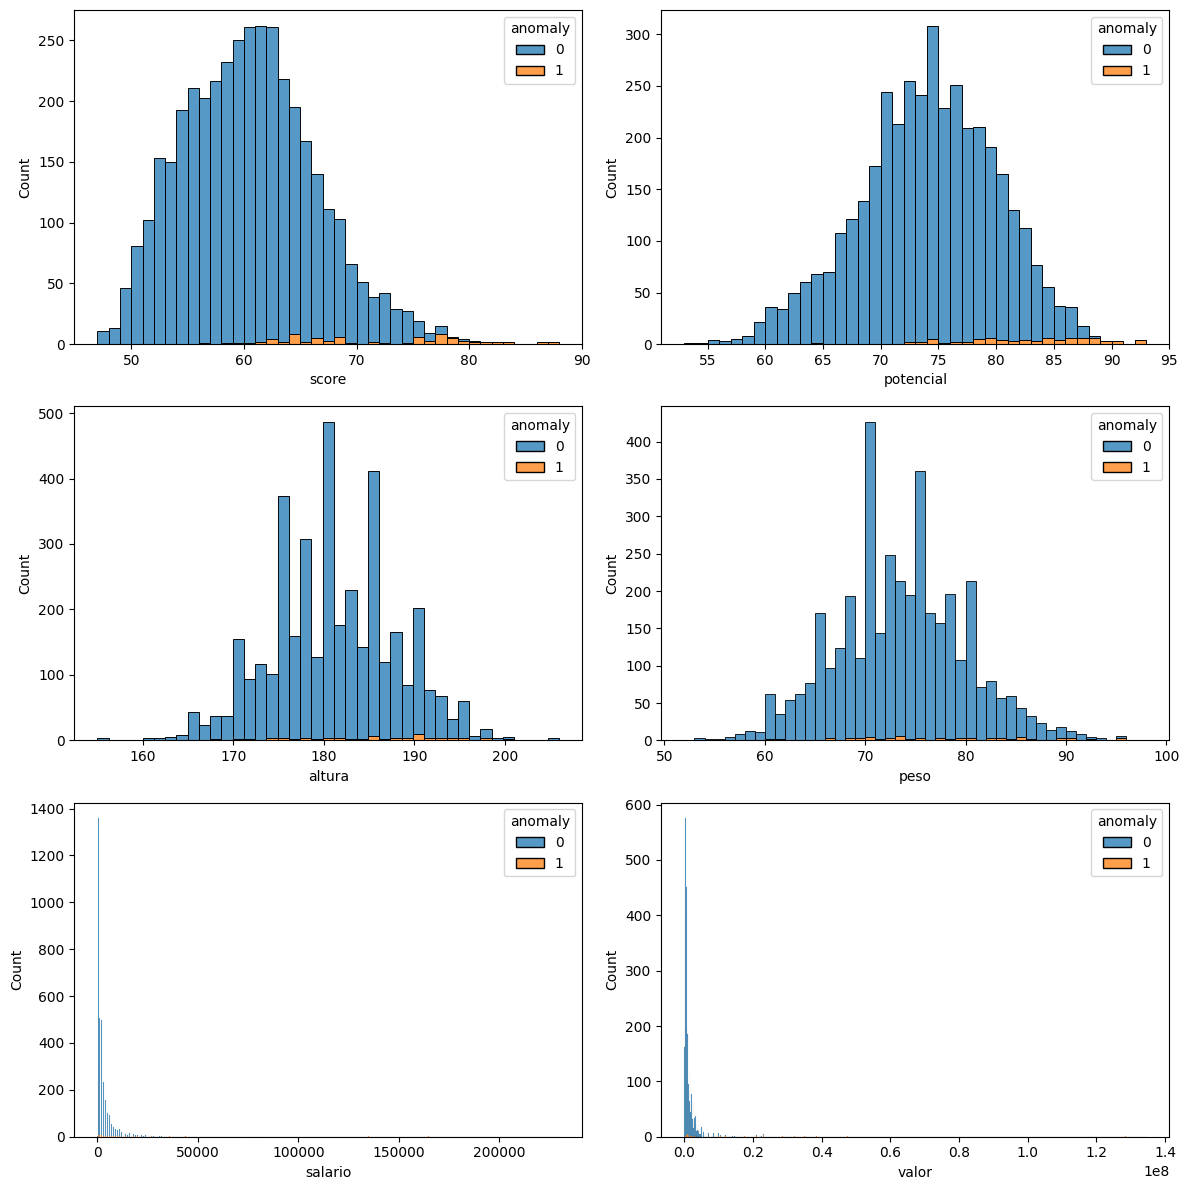

In [68]:
# Histogramas para ver la distribución de algunas características clave
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(data=jugadores, x='score', hue='anomaly', multiple='stack', ax=axs[0, 0])
sns.histplot(data=jugadores, x='potencial', hue='anomaly', multiple='stack', ax=axs[0, 1])
sns.histplot(data=jugadores, x='altura', hue='anomaly', multiple='stack', ax=axs[1, 0])
sns.histplot(data=jugadores, x='peso', hue='anomaly', multiple='stack', ax=axs[1, 1])
sns.histplot(data=jugadores, x='salario', hue='anomaly', multiple='stack', ax=axs[2, 0])
sns.histplot(data=jugadores, x='valor', hue='anomaly', multiple='stack', ax=axs[2, 1])

plt.tight_layout()
plt.show()


## Histogramas de Distribución: Comparación de Jugadores Normales y Anómalos

Los siguientes histogramas muestran la distribución de varias características clave de los jugadores, comparando aquellos identificados como normales (anomaly=0) con las anomalías detectadas (anomaly=1) por el modelo de Isolation Forest.

### Conclusiones de los Histogramas:

1. **Score:**
   - La mayoría de los jugadores normales tienen un score entre 55 y 75.
   - Las anomalías tienden a tener scores más bajos, aunque también hay algunas con scores muy altos.

2. **Potencial:**
   - La distribución del potencial es más amplia, con la mayoría de los jugadores normales concentrados entre 65 y 80.
   - Las anomalías se distribuyen a lo largo de todo el rango, con una ligera tendencia a valores extremos (muy bajos o muy altos).

3. **Altura:**
   - La mayoría de los jugadores normales tienen una altura entre 170 cm y 190 cm.
   - Las anomalías están dispersas a lo largo de todo el rango de alturas, indicando jugadores significativamente más bajos o más altos que el promedio.

4. **Peso:**
   - Los jugadores normales tienen un peso que oscila principalmente entre 60 kg y 80 kg.
   - Las anomalías se encuentran en ambos extremos del espectro de peso, indicando jugadores significativamente más ligeros o más pesados que el promedio.

5. **Salario:**
   - La mayoría de los jugadores normales tienen salarios bajos, con una distribución que decrece rápidamente.
   - Las anomalías tienen salarios que son mucho más altos, lo que podría indicar jugadores sobrevalorados o casos atípicos en términos de remuneración.

6. **Valor:**
   - El valor de los jugadores muestra una distribución sesgada hacia la izquierda, con la mayoría de los jugadores normales teniendo valores bajos.
   - Las anomalías tienden a tener valores extremadamente altos, lo que podría indicar sobrevaloraciones o rarezas en el mercado de transferencias.

### Implicaciones:

- **Identificación de Jugadores Atípicos:**
  - Estas visualizaciones ayudan a identificar jugadores con características atípicas que pueden requerir una atención especial o un análisis más profundo.
  - Las anomalías en salario y valor pueden señalar posibles sobrevaloraciones o errores en la evaluación de los jugadores.

- **Ajuste de Modelos:**
  - La información sobre la distribución de anomalías puede ser útil para ajustar modelos predictivos y mejorar la precisión de las evaluaciones de jugadores.
  - Comprender las distribuciones normales y anómalas ayuda a mejorar las estrategias de scouting y gestión de equipos.

Estos histogramas proporcionan una visión detallada de cómo las características de los jugadores se distribuyen y cómo se comparan las anomalías con los jugadores normales, ofreciendo información valiosa para analistas deportivos y gestores de equipos.


### Análisis Descriptivo de Jugadores Anómalos y Normales

En este código vamos a realizar los siguientes pasos:

1. **Separar los Datos en Anomalías y No Anomalías:**
   - Dividimos el DataFrame `jugadores` en dos subconjuntos:
     - `jugadores_anomalias`: Contiene los jugadores etiquetados como anómalos (`anomaly == 1`).
     - `jugadores_normales`: Contiene los jugadores etiquetados como normales (`anomaly == 0`).

2. **Generar un Resumen Estadístico:**
   - Para ambos subconjuntos, generamos un resumen estadístico que incluye:
     - Número de observaciones (Count).
     - Media aritmética (Mean).
     - Desviación estándar (Std).
     - Valores mínimo (Min), primer cuartil (25%), mediana (50%), tercer cuartil (75%) y máximo (Max).

El objetivo de este análisis es comparar las características estadísticas de los jugadores anómalos con los normales. Esto nos permitirá identificar diferencias clave y patrones específicos que puedan existir entre estos dos grupos. Además, nos ayudará a validar la identificación de anomalías y a mejorar nuestras estrategias de análisis de datos y evaluación de jugadores.


In [69]:
# Separar los datos en anomalías y no anomalías
jugadores_anomalias = jugadores[jugadores['anomaly'] == 1]
jugadores_normales = jugadores[jugadores['anomaly'] == 0]

# Resumen estadístico para anomalías
print("Estadísticas descriptivas para jugadores anómalos:")
print(jugadores_anomalias.describe())

# Resumen estadístico para no anomalías
print("Estadísticas descriptivas para jugadores normales:")
print(jugadores_normales.describe())


Estadísticas descriptivas para jugadores anómalos:
        id_jugador       edad      score  potencial      equipo     contrato  \
count    78.000000  78.000000  78.000000  78.000000   78.000000    78.000000   
mean   2820.897436  19.371795  71.628205  82.371795  349.243590  1481.282051   
std    1028.409914   0.854461   7.869238   5.815584  184.776255   904.924664   
min     149.000000  17.000000  56.000000  64.000000    7.000000     0.000000   
25%    2282.250000  19.000000  64.250000  78.250000  209.000000     0.000000   
50%    3097.000000  20.000000  71.500000  83.000000  386.500000  2026.500000   
75%    3649.000000  20.000000  77.750000  87.000000  490.250000  2028.000000   
max    4129.000000  20.000000  88.000000  93.000000  642.000000  2031.000000   

           altura       peso  pie_bueno    general     puesto       prog  \
count   78.000000  78.000000  78.000000  78.000000  78.000000  78.000000   
mean   185.410256  77.294872   0.410256  72.474359   9.576923  10.743590   


### Resumen Estadístico de Jugadores Anómalos y Normales

#### Jugadores Anómalos:
- **Edad:**
  - Media: 19.37 años
  - Rango: 17-20 años
- **Score:**
  - Media: 71.63
  - Rango: 56-88
- **Potencial:**
  - Media: 82.37
  - Rango: 64-93
- **Altura:**
  - Media: 185.41 cm
  - Rango: 168-200 cm
- **Peso:**
  - Media: 77.29 kg
  - Rango: 60-95 kg
- **Salario:**
  - Media: 25,832 euros
  - Rango: 500-230,000 euros
- **Valor:**
  - Media: 19,644,870 euros
  - Rango: 275,000-134,500,000 euros
- **Habilidades Clave:**
  - **Centros:** Media: 38.73, Rango: 8-82
  - **Definición:** Media: 36.45, Rango: 5-87
  - **Pases Cortos:** Media: 51.06, Rango: 15-90
  - **Regates:** Media: 44.00, Rango: 5-94
  - **Control de Balón:** Media: 46.97, Rango: 10-90

#### Jugadores Normales:
- **Edad:**
  - Media: 18.75 años
  - Rango: 16-20 años
- **Score:**
  - Media: 59.83
  - Rango: 47-80
- **Potencial:**
  - Media: 73.45
  - Rango: 53-88
- **Altura:**
  - Media: 180.95 cm
  - Rango: 155-206 cm
- **Peso:**
  - Media: 72.99 kg
  - Rango: 52-98 kg
- **Salario:**
  - Media: 2,624.71 euros
  - Rango: 0-67,000 euros
- **Valor:**
  - Media: 1,134,797 euros
  - Rango: 0-35,500,000 euros
- **Habilidades Clave:**
  - **Centros:** Media: 44.19, Rango: 7-81
  - **Definición:** Media: 42.56, Rango: 3-81
  - **Pases Cortos:** Media: 54.15, Rango: 13-82
  - **Regates:** Media: 52.95, Rango: 3-90
  - **Control de Balón:** Media: 54.65, Rango: 9-82

#### Observaciones:
1. **Edad y Potencial:**
   - Los jugadores anómalos son ligeramente mayores y tienen un mayor potencial promedio en comparación con los jugadores normales.
2. **Score y Habilidades:**
   - Los jugadores anómalos tienen un score promedio significativamente más alto y mayores habilidades en centros, definición, pases cortos, regates y control de balón.
3. **Salario y Valor:**
   - Los jugadores anómalos tienen salarios y valores significativamente más altos en comparación con los jugadores normales.
4. **Altura y Peso:**
   - Los jugadores anómalos tienden a ser más altos y pesados en promedio.

Este análisis destaca diferencias clave entre los jugadores anómalos y normales, lo que puede ayudar a identificar características distintivas y potenciales áreas de mejora o monitoreo en el rendimiento de los jugadores.


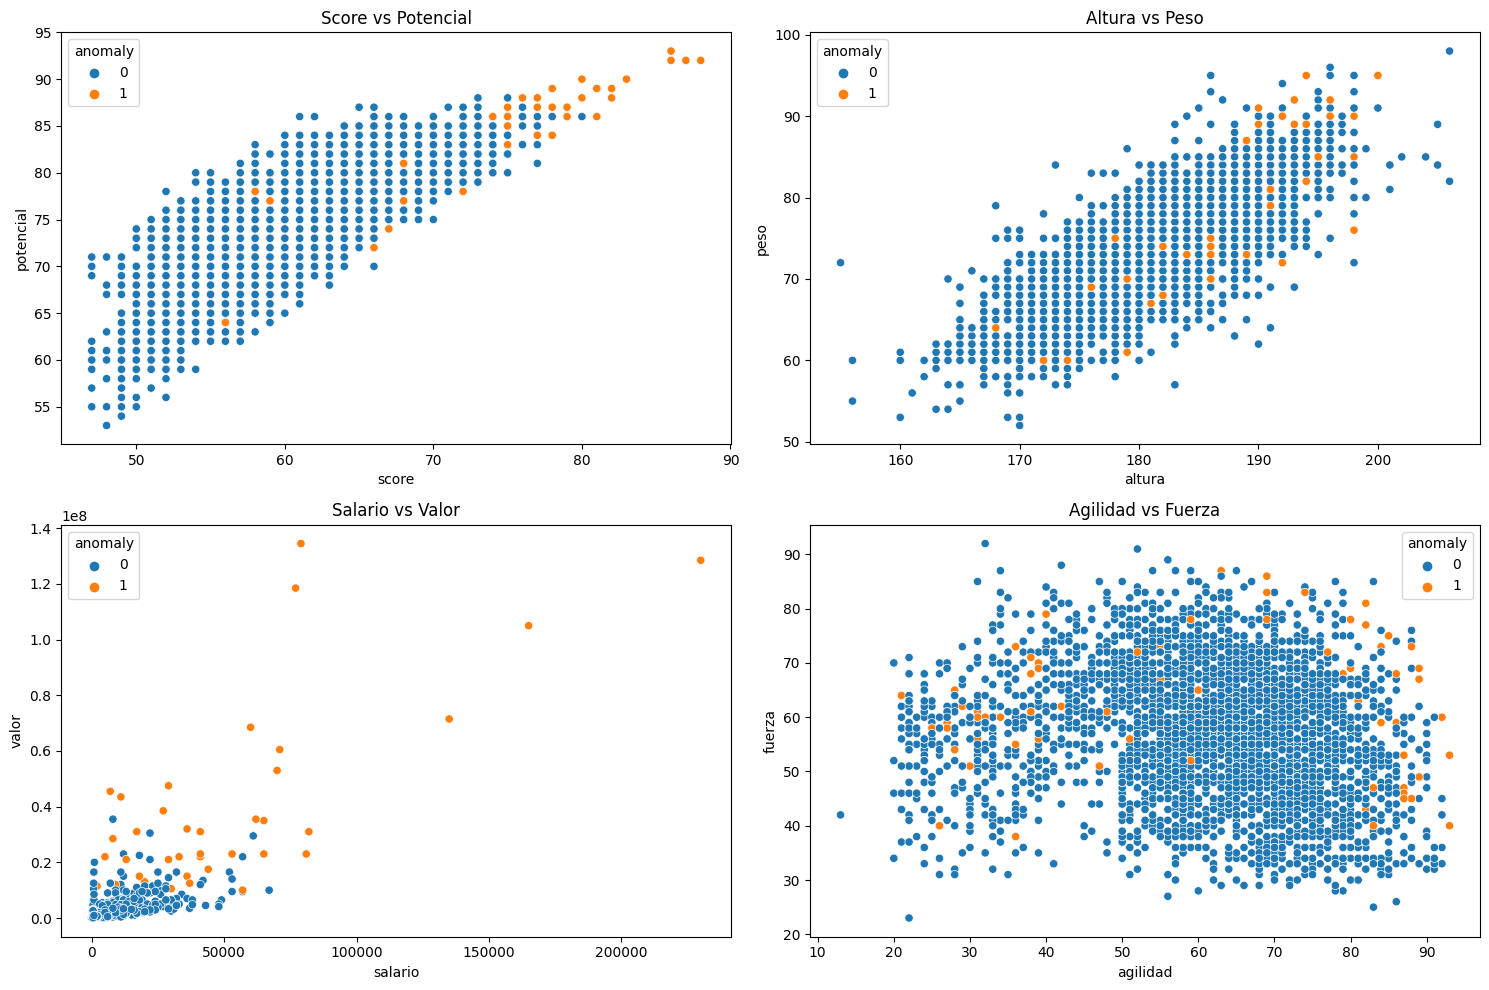

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráficos de dispersión para las características más relevantes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x='score', y='potencial', hue='anomaly', data=jugadores, ax=axes[0, 0])
axes[0, 0].set_title('Score vs Potencial')

sns.scatterplot(x='altura', y='peso', hue='anomaly', data=jugadores, ax=axes[0, 1])
axes[0, 1].set_title('Altura vs Peso')

sns.scatterplot(x='salario', y='valor', hue='anomaly', data=jugadores, ax=axes[1, 0])
axes[1, 0].set_title('Salario vs Valor')

sns.scatterplot(x='agilidad', y='fuerza', hue='anomaly', data=jugadores, ax=axes[1, 1])
axes[1, 1].set_title('Agilidad vs Fuerza')

plt.tight_layout()
plt.show()


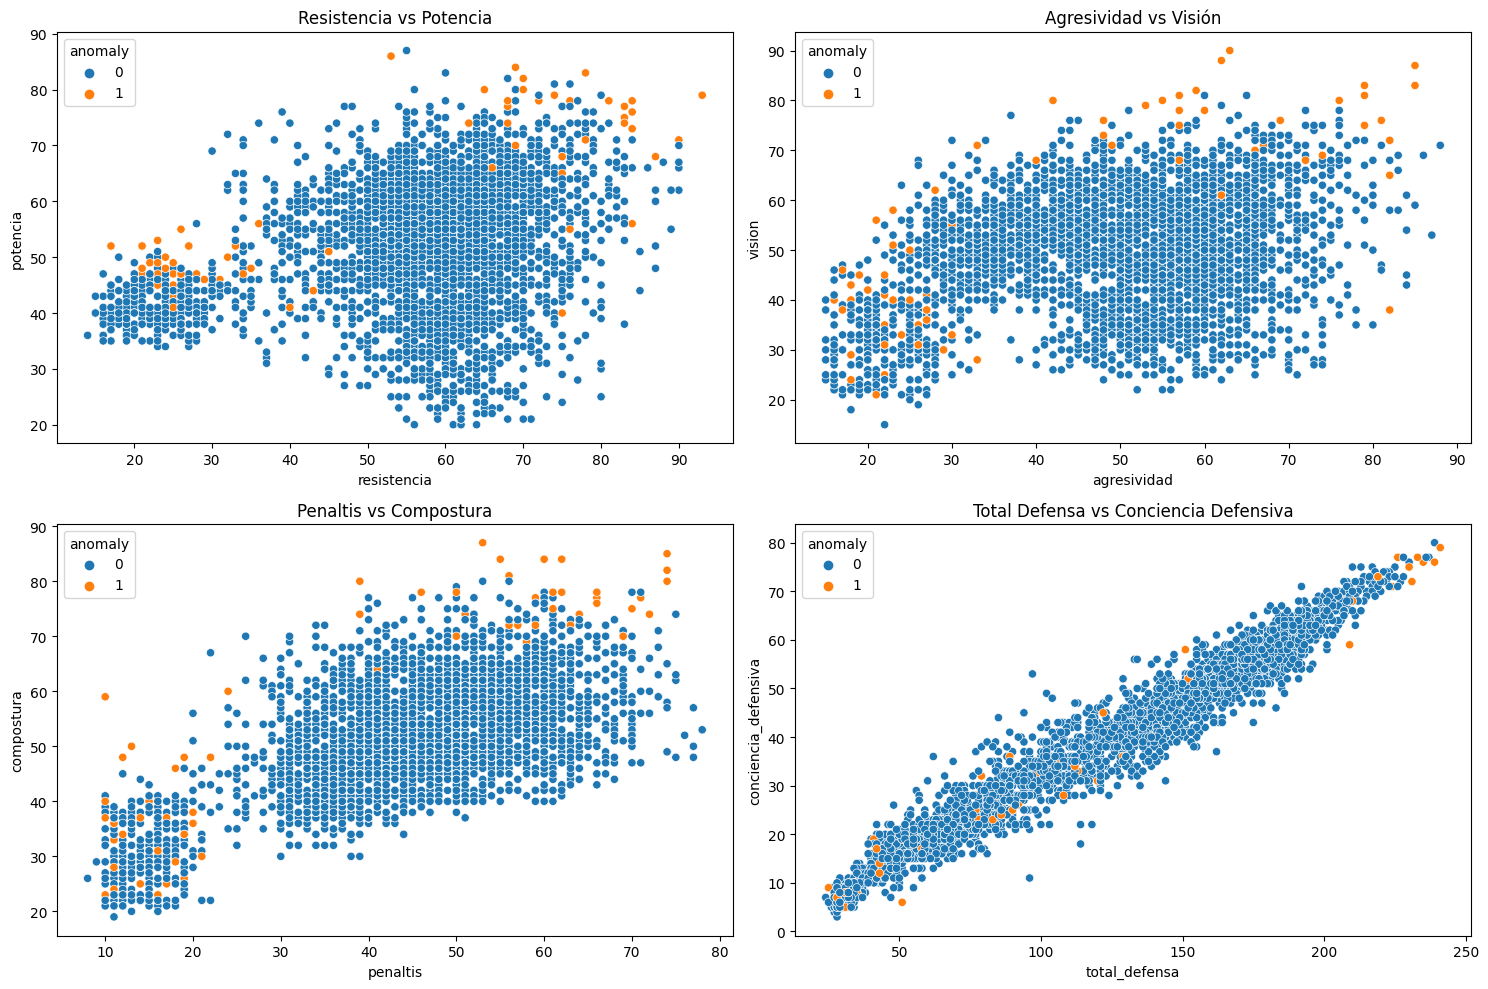

In [71]:
# Más gráficos de dispersión para otras características
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x='resistencia', y='potencia', hue='anomaly', data=jugadores, ax=axes[0, 0])
axes[0, 0].set_title('Resistencia vs Potencia')

sns.scatterplot(x='agresividad', y='vision', hue='anomaly', data=jugadores, ax=axes[0, 1])
axes[0, 1].set_title('Agresividad vs Visión')

sns.scatterplot(x='penaltis', y='compostura', hue='anomaly', data=jugadores, ax=axes[1, 0])
axes[1, 0].set_title('Penaltis vs Compostura')

sns.scatterplot(x='total_defensa', y='conciencia_defensiva', hue='anomaly', data=jugadores, ax=axes[1, 1])
axes[1, 1].set_title('Total Defensa vs Conciencia Defensiva')



plt.tight_layout()
plt.show()


In [72]:
# Eliminar columnas no numéricas para el PCA
numeric_columns = jugadores.select_dtypes(include=['float64', 'int64']).columns
X = jugadores[numeric_columns].drop(columns=['anomaly'])  # Asegúrate de que 'anomaly' está en los datos

# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
jugadores['PCA1'] = pca_result[:, 0]
jugadores['PCA2'] = pca_result[:, 1]

# Gráfico de dispersión interactivo
fig = px.scatter(jugadores, x='PCA1', y='PCA2', color='anomaly',
                 title='Detección de Anomalías con Isolation Forest',
                 labels={'PCA1': 'Componente Principal 1', 'PCA2': 'Componente Principal 2'},
                 hover_data=['nombre', 'equipo', 'score', 'potencial'],
                 color_continuous_scale='Picnic')


# Centrar el título
fig.update_layout(title={'text': "Detección de Anomalías con Isolation Forest", 'x':0.5, 'xanchor': 'center'})

fig.show()


## Análisis del Gráfico "Detección de Anomalías con Isolation Forest"
### Descripción del Gráfico:
Este gráfico de dispersión muestra las anomalías detectadas en los datos de los jugadores utilizando Isolation Forest. Los puntos en el gráfico representan jugadores individuales proyectados en dos componentes principales obtenidos mediante PCA.

### Elementos Clave del Gráfico:
- **Ejes:**
  - **Eje X (Componente Principal 1):** Primera componente principal de los datos reducidos.
  - **Eje Y (Componente Principal 2):** Segunda componente principal de los datos reducidos.
- **Colores:**
  - **Puntos Azules:** Jugadores no identificados como anomalías.
  - **Puntos Amarillos:** Jugadores identificados como anomalías por el modelo de Isolation Forest.
- **Información Interactiva:**
  - Al pasar el cursor sobre un punto, se muestra información adicional sobre el jugador, incluyendo su nombre, equipo, score, y potencial.

### Interpretación del Gráfico:
- **Distribución de Jugadores:**
  - Se observa una agrupación densa de puntos azules en el centro, indicando que la mayoría de los jugadores tienen características similares.
- **Detección de Anomalías:**
  - Los puntos amarillos (anomalías) indican jugadores cuyas características no siguen el patrón común de la mayoría de los jugadores. Estos pueden ser jugadores con características excepcionalmente altas o bajas.


In [73]:
# Gráfico interactivo de Score vs Potencial
fig_score_potencial = px.scatter(jugadores, x='score', y='potencial', color='anomaly',
                                 title='Score vs Potencial con Anomalías',
                                 labels={'score': 'Score', 'potencial': 'Potencial'},
                                 hover_data=['nombre', 'equipo', 'score', 'potencial'],
                                 color_continuous_scale='Picnic')
# Centrar el título
fig_score_potencial.update_layout(title={'text': "Score vs Potencial con Anomalías", 'x': 0.5, 'xanchor': 'center'})

fig_score_potencial.show()



### Análisis del Gráfico "Score vs Potencial con Anomalías"

**Descripción del Gráfico:**
Este gráfico de dispersión muestra la relación entre el score y el potencial de los jugadores. Los puntos en el gráfico representan jugadores individuales, con el score en el eje x y el potencial en el eje y.

**Elementos Clave del Gráfico:**

**Ejes:**
- **Eje X (Score):** Representa la calificación actual del jugador.
- **Eje Y (Potencial):** Representa la calificación máxima que el jugador podría alcanzar en el futuro.

**Colores:**
- Los puntos azules representan jugadores que no han sido identificados como anomalías.
- Los puntos amarillos representan jugadores que han sido identificados como anomalías por el modelo de Isolation Forest.

**Información Interactiva:**
- Al pasar el cursor sobre un punto, se muestra información adicional sobre el jugador, como su nombre, equipo, score, potencial y si es una anomalía (1 para anomalía, 0 para no anomalía).

**Interpretación del Gráfico:**

** Ejemplo de uso - Relación entre Score y Potencial:**
- Existe una tendencia clara y positiva entre el score y el potencial. Esto sugiere que, generalmente, los jugadores con un mayor score actual también tienen un mayor potencial futuro.

**Detección de Anomalías:**
- Los puntos amarillos (anomalías) indican jugadores cuyas características no siguen el patrón común de la mayoría de los jugadores. Estos pueden ser jugadores con un score o potencial excepcionalmente alto o bajo en comparación con el resto.
- Por ejemplo, en el gráfico vemos que Jude Bellingham (marcado como anomalía) tiene un score de 88 y un potencial de 92, lo cual es bastante alto en comparación con otros jugadores, haciendo que sea identificado como una anomalía.

**Utilidad del Gráfico:**
- **Identificación de Jugadores Excepcionales:** Las anomalías pueden representar jugadores excepcionales que valen la pena seguir de cerca por su alto rendimiento o potencial.
- **Atención Especial:** También puede indicar jugadores que podrían necesitar atención especial o un análisis más profundo debido a sus estadísticas atípicas.

Este gráfico es una herramienta poderosa para los analistas y entrenadores, ya que les permite identificar jugadores que se destacan o que necesitan atención adicional, ayudando a tomar decisiones más informadas sobre el desarrollo y la gestión de los jugadores.


In [74]:
# Gráfico interactivo de Altura vs Peso
fig_altura_peso = px.scatter(jugadores, x='altura', y='peso', color='anomaly',
                             title='Altura vs Peso con Anomalías',
                             labels={'altura': 'Altura', 'peso': 'Peso'},
                             hover_data=['nombre', 'equipo'],
                             color_continuous_scale='Picnic')

# Centrar el título
fig_altura_peso.update_layout(title={'text': "Altura vs Peso con Anomalías", 'x': 0.5, 'xanchor': 'center'})

fig_altura_peso.show()


## Análisis del Gráfico "Altura vs Peso con Anomalías"
### Descripción del Gráfico:
Este gráfico de dispersión muestra la relación entre la altura y el peso de los jugadores. Los puntos en el gráfico representan jugadores individuales, con la altura en el eje x y el peso en el eje y.

### Elementos Clave del Gráfico:
- **Ejes:**
  - **Eje X (Altura):** Representa la altura del jugador.
  - **Eje Y (Peso):** Representa el peso del jugador.
- **Colores:**
  - **Puntos Azules:** Jugadores no identificados como anomalías.
  - **Puntos Amarillos:** Jugadores identificados como anomalías por el modelo de Isolation Forest.
- **Información Interactiva:**
  - Al pasar el cursor sobre un punto, se muestra información adicional sobre el jugador, como su nombre, equipo, y otras características.

### Interpretación del Gráfico:
- **Relación entre Altura y Peso:**
  - Existe una relación positiva entre la altura y el peso, como era de esperarse.
- **Detección de Anomalías:**
  - Los puntos amarillos (anomalías) indican jugadores cuyas características de altura y peso no siguen el patrón común.


In [75]:
# Gráfico interactivo de Salario vs Valor
fig_salario_valor = px.scatter(jugadores, x='salario', y='valor', color='anomaly',
                               title='Salario vs Valor con Anomalías',
                               labels={'salario': 'Salario', 'valor': 'Valor'},
                               hover_data=['nombre', 'equipo'],
                               color_continuous_scale='Picnic')

# Centrar el título
fig_salario_valor.update_layout(title={'text': "Salario vs Valor con Anomalías", 'x': 0.5, 'xanchor': 'center'})

fig_salario_valor.show()


## Análisis del Gráfico "Salario vs Valor con Anomalías"
### Descripción del Gráfico:
Este gráfico de dispersión muestra la relación entre el salario y el valor de los jugadores. Los puntos en el gráfico representan jugadores individuales, con el salario en el eje x y el valor en el eje y.

### Elementos Clave del Gráfico:
- **Ejes:**
  - **Eje X (Salario):** Representa el salario del jugador.
  - **Eje Y (Valor):** Representa el valor de mercado del jugador.
- **Colores:**
  - **Puntos Azules:** Jugadores no identificados como anomalías.
  - **Puntos Amarillos:** Jugadores identificados como anomalías por el modelo de Isolation Forest.
- **Información Interactiva:**
  - Al pasar el cursor sobre un punto, se muestra información adicional sobre el jugador, como su nombre, equipo, y otras características.

### Interpretación del Gráfico:
- **Relación entre Salario y Valor:**
  - Los jugadores con un mayor salario tienden a tener un mayor valor de mercado, aunque hay algunas excepciones notables.
- **Detección de Anomalías:**
  - Los puntos amarillos (anomalías) indican jugadores cuyas características de salario y valor no siguen el patrón común, siendo jugadores que podrían tener un salario muy alto o un valor muy bajo en comparación con otros.


In [76]:
# Gráfico interactivo de Agilidad vs Fuerza
fig_agilidad_fuerza = px.scatter(jugadores, x='agilidad', y='fuerza', color='anomaly',
                                 title='Agilidad vs Fuerza con Anomalías',
                                 labels={'agilidad': 'Agilidad', 'fuerza': 'Fuerza'},
                                 hover_data=['nombre', 'equipo'],
                                 color_continuous_scale='Picnic')

# Centrar el título
fig_agilidad_fuerza.update_layout(title={'text': "Agilidad vs Fuerza con Anomalías", 'x': 0.5, 'xanchor': 'center'})

fig_agilidad_fuerza.show()


## Análisis del Gráfico "Agilidad vs Fuerza con Anomalías"
### Descripción del Gráfico:
Este gráfico de dispersión muestra la relación entre la agilidad y la fuerza de los jugadores. Los puntos en el gráfico representan jugadores individuales, con la agilidad en el eje x y la fuerza en el eje y.

### Elementos Clave del Gráfico:
- **Ejes:**
  - **Eje X (Agilidad):** Representa la agilidad del jugador.
  - **Eje Y (Fuerza):** Representa la fuerza del jugador.
- **Colores:**
  - **Puntos Azules:** Jugadores no identificados como anomalías.
  - **Puntos Amarillos:** Jugadores identificados como anomalías por el modelo de Isolation Forest.
- **Información Interactiva:**
  - Al pasar el cursor sobre un punto, se muestra información adicional sobre el jugador, como su nombre, equipo, y otras características.

### Interpretación del Gráfico:
- **Relación entre Agilidad y Fuerza:**
  - No parece haber una relación clara entre la agilidad y la fuerza de los jugadores, sugiriendo que estas dos características pueden variar independientemente.
- **Detección de Anomalías:**
  - Los puntos amarillos (anomalías) indican jugadores cuyas características de agilidad y fuerza no siguen el patrón común, destacándose por ser extremadamente ágiles o fuertes en comparación con otros.